<a href="https://colab.research.google.com/github/brentwong-kiel1997/demo-repo/blob/main/case_study_for_container_xchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

## Case Study for Container xChange

**Prepared by:** Brent Wong (Mingqian Wang)  
**Email:** [brentwang1997@gmail.com](mailto:brentwang1997@gmail.com)  

For any inquiries, please contact me via email.

---

Feel free to visit my personal website: [profile-page-brentwong.pythonanywhere.com](http://profile-page-brentwong.pythonanywhere.com/)  
Explore my project website: [bals-brentwong.pythonanywhere.com](http://bals-brentwong.pythonanywhere.com/) [BTC Price Analysis](https://profile-page-brentwong.pythonanywhere.com/BTC_price)

---



## Reasons for Choosing Google Colab as the Platform

1. **Web-Based Application**:
   - No need to set up a local environment to run.
   - Previous work is accessible without re-running the code.

2. **Designed for Experiments, Data Analysis, and Visualization**:
   - Ideal for displaying and sharing data-driven projects.

3. ## Reason for Choosing Google Colab as the Platform

1. **Web-Based Application**:
   - No need to set up a local environment to run.
   - Previous work is accessible without re-running the code.

2. **Designed for Experiments, Data Analysis, and Visualization**:
   - Ideal for displaying and sharing data-driven projects.

3. **Mature Environment Setup**:
   - Easy to migrate work to another application.
     - **Linux-Based**: Facilitates smooth migration to a Linux server.
     - **Python Code**: Ensures compatibility and ease of use across different platforms.
     - **Web-Based**: Simplifies the integration of techniques used here into other web-based applications.
       - Example of my work: [BTC Price Analysis](https://profile-page-brentwong.pythonanywhere.com/BTC_price)



In [72]:
# CPU Information
print("CPU Information:")
!lscpu
print("\n")

# Memory Information
print("Memory Information:")
!free -h
print("\n")

# Disk Space
print("Disk Space:")
!df -h
print("\n")

# GPU Information
print("GPU Information:")
!nvidia-smi
print("\n")

# Python Version
print("Python Version:")
!python --version
print("\n")

# Installed Libraries
print("Installed Libraries:")
!pip list
print("\n")

# System Uptime
print("System Uptime:")
!uptime
print("\n")

# Kernel Information
print("Kernel Information:")
!uname -a
print("\n")

# Linux OS Information
print("Linux OS Information:")
!lsb_release -a
print("\n")

print("OS Version Information:")
!cat /etc/os-release
print("\n")


CPU Information:
Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.43
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm ab

## Before You Run the Codes

1. **Upload the CSV Files**:
   - Please upload the CSV files to the Colab folder using the folder icon on the right column.

2. **Apology for Limited Time and Energy**:
   - Apologies for not being able to devote more time and energy to this case study.
   - Section 1.1 and Section 2 are more detailed, and I spent more time on those.
   - I hope the skills and expertise showcased in these sections will be sufficient to demonstrate my compatibility for this job.

Thank you and have fun exploring my work!




# 0.SQL and Data setup

## 0.1: Install the necessary libraries
Make sure you have pandas and  sqlalchemy installed. If you are using Jupyter Notebook, these should be pre-installed, but you can install them using the following commands if needed:

In [73]:
!pip install pandas sqlalchemy statsmodels matplotlib tabulate folium

## 0.2: Load the CSV data into pandas DataFrames

please upload the data in the folder




In [74]:
import pandas as pd
import numpy as np

# Load CSV files
user_df = pd.read_csv('1_User_Dataset_Risk.csv')
transaction_df = pd.read_csv('2_Transaction_Dataset_Risk.csv')
location_df = pd.read_csv('3_Location_Dataset_Risk.csv')
equity_loan_df = pd.read_csv('Equity_loan_dataset.csv')

# Remove duplicates
user_df = user_df.drop_duplicates('company_id')

# Remove duplicates
transaction_df = transaction_df.drop_duplicates('transaction_id')

user_df.head()


,company_id,signup_date,failure_score_assessment,delinquincy_score_assessment,overall_risk_assessment,platform_access,city,country,region,user_count,unit_limit,credit_limit
0,153,22/11/2017,Undetermined,Unavailable,high,NO ACCESS,Hong Kong,Hong Kong,North East Asia,3.0,0,0.0
1,2377,12/03/2021,NaN,NaN,NaN,NO ACCESS,Fukui,Japan,Japan & Korea,1.0,0,0.0
2,4132,7/01/2022,Unavailable,Unavailable,high,NO ACCESS,Ho Chi Minh,Vietnam,South East Asia,2.0,0,-10000.0
3,5229,2/05/2022,moderate-high,moderate,moderate-high,NO ACCESS,Texas,United States,North America,2.0,0,0.0
4,9963,24/10/2023,NaN,NaN,high,NO ACCESS,Thane,India,Middle East & ISC,1.0,10,-10000.0


## 0.3 : Create a SQLite database and define the schema

Two key points in here:
1. set up the primary key for each table
    
| Table name | pk |
|----------|----------|
| 1_User_Dataset_Risk | company_id |
| 2_Transaction_Dataset_Risk | transaction_id |
| 3_Location_Dataset_Risk | New pk |
| Equity_loan_dataset | New pk |


2. set up the foreign keys for relationships between the tables
   
    
| Table name | column | foreign key |
|----------|----------|----------|
| 2_Transaction_Dataset_Risk | supplier_company_id | 1_User_Dataset_Risk |
| 2_Transaction_Dataset_Risk | user_company_id | 1_User_Dataset_Risk |
| 3_Location_Dataset_Risk | transaction_id | 2_Transaction_Dataset_Risk |



In [75]:
from sqlalchemy import create_engine, Column, Integer, String, Float, DateTime, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

# Create SQLite engine and base
engine = create_engine('sqlite:///risk_dataset.db')
Base = declarative_base()

# Define User table
class User(Base):
    __tablename__ = 'user'
    company_id = Column(Integer, primary_key=True)
    signup_date = Column(String)  # Adjust the data type if necessary
    failure_score_assessment = Column(String)
    delinquincy_score_assessment = Column(String)
    overall_risk_assessment = Column(String)
    platform_access = Column(String)
    city = Column(String)
    country = Column(String)
    region = Column(String)
    user_count = Column(Float)
    unit_limit = Column(Integer)
    credit_limit = Column(Float)

# Define Transaction table
class Transaction(Base):
    __tablename__ = 'transaction_data'
    transaction_id = Column(Integer, primary_key=True)
    supplier_company_id = Column(Integer, ForeignKey('user.company_id'))
    user_company_id = Column(Integer, ForeignKey('user.company_id'))
    pickup_charge_payer_role = Column(String)
    status = Column(String)
    free_days_count = Column(Float)
    container_type = Column(String)
    container_condition = Column(String)
    container_count = Column(Float)
    price_per_container = Column(Float)
    picked_up_container_count = Column(Float)
    dropped_off_container_count = Column(Float)
    pickup_charge = Column(Float)
    accepted_at = Column(DateTime)
    completed_at = Column(DateTime)
    created_date = Column(DateTime)
    min_pickup_date = Column(DateTime)
    max_pickup_date = Column(DateTime)
    min_dropped_off_date = Column(DateTime)
    max_dropped_off_date = Column(DateTime)
    days_to_pay = Column(Float)
    puc_payment_ratio = Column(String)
    amount = Column(Float)
    replacement_value = Column(Float)
    per_diem = Column(Float)
    invoice_status = Column(String)

# Define Location table
class Location(Base):
    __tablename__ = 'location'
    location_id = Column(Integer, primary_key=True, autoincrement=True)
    transaction_id = Column(Integer, ForeignKey('transaction_data.transaction_id'))
    pickup_city = Column(String)
    pickup_country = Column(String)
    pickup_region = Column(String)
    dropoff_city = Column(String)
    dropoff_country = Column(String)
    dropoff_region = Column(String)

# Define Equity Loan table
class EquityLoan(Base):
    __tablename__ = 'equity_loan'
    equity_loan_id = Column(Integer, primary_key=True, autoincrement=True)
    BAD = Column(Integer)
    LOAN = Column(Float)
    MORTDUE = Column(Float)
    VALUE = Column(Float)
    REASON = Column(String)
    JOB = Column(String)
    YOJ = Column(Float)
    DEROG = Column(Float)
    DELINQ = Column(Float)
    CLAGE = Column(Float)
    NINQ = Column(Float)
    CLNO = Column(Float)
    DEBTINC = Column(Float)

# Drop existing tables (if any) and create new tables
Base.metadata.drop_all(engine)
Base.metadata.create_all(engine)

<ipython-input-75-78bed728fa92>:7: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


## 0.4 : Insert the data into the database


In [76]:
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Insert data into User table
user_df.to_sql('user', engine, if_exists='append', index=False)

# Insert data into Transaction table
transaction_df.to_sql('transaction_data', engine, if_exists='append', index=False)

# Insert data into Location table with new primary key
location_df.to_sql('location', engine, if_exists='append', index=False)

# Insert data into Equity Loan table with new primary key
equity_loan_df.to_sql('equity_loan', engine, if_exists='append', index=False)

# Commit the session
session.commit()

## 0.5: Verify the data and foreign keys


In [77]:
# Verify the data in the tables
print("Users in database:")
print(pd.read_sql('SELECT * FROM user', engine).head())

print("\nTransactions in database:")
print(pd.read_sql('SELECT * FROM transaction_data', engine).head())

print("\nLocations in database:")
print(pd.read_sql('SELECT * FROM location', engine).head())

print("\nEquity Loans in database:")
print(pd.read_sql('SELECT * FROM equity_loan', engine).head())

Users in database:
   company_id signup_date failure_score_assessment  \
0           1  26/05/2015                     None   
1           2   9/01/2019                     None   
2           3  26/05/2015                     None   
3           4  26/05/2015                     None   
4           5  29/06/2016                     None   

  delinquincy_score_assessment overall_risk_assessment platform_access  \
0                         None                    None       NO ACCESS   
1                         None                    None       NO ACCESS   
2                         None                    None       NO ACCESS   
3                         None                    None    LEASING ONLY   
4                         None                    None       NO ACCESS   

                 city      country           region  user_count  unit_limit  \
0           Singapore    Singapore  South East Asia         4.0           0   
1  Marseille cedex 02       France     Europe North  

# 1.Analysis of Financial Risk Data

In [78]:
## Data Import and Initial Exploration
import pandas as pd
from sqlalchemy import create_engine

# Create SQLite engine
engine = create_engine('sqlite:///risk_dataset.db')

# Load datasets from SQL database
user_df = pd.read_sql('SELECT * FROM user', engine)
transaction_df = pd.read_sql('SELECT * FROM transaction_data', engine)
location_df = pd.read_sql('SELECT * FROM location', engine)


In [79]:
company_id = np.array(transaction_df['supplier_company_id'])+np.array(transaction_df['user_company_id'])
values, counts = np.unique(company_id, return_counts=True)

counts.shape,

((1004,),)

In [80]:
# Count of unique transactions
unique_transactions = location_df['transaction_id'].nunique()
unique_transactions

27237

#### summary
The tree tables should be in a relational database. However all signs point to that different date ranges are applied during samping. For example, there are 27,237 unique transaction_id values in the location table, but the transaction data table only has 4,672 entries. Therefore, a relational analysis is impossible based on current data.

## 1.1 location table analysis

In [81]:
## Data Import and Initial Exploration
import pandas as pd
from sqlalchemy import create_engine

# Create SQLite engine
engine = create_engine('sqlite:///risk_dataset.db')

# Load location table from SQL database
location_df = pd.read_sql('SELECT * FROM location', engine, index_col = 'location_id')
location_df.head(), location_df.shape

(             transaction_id pickup_city pickup_country    pickup_region  \
 location_id                                                               
 1                    262546   Singapore      Singapore  South East Asia   
 2                    239780     Qingdao          China  North East Asia   
 3                    239780     Qingdao          China  North East Asia   
 4                    239780     Qingdao          China  North East Asia   
 5                    261621     Tianjin          China  North East Asia   
 
                                dropoff_city     dropoff_country dropoff_region  
 location_id                                                                     
 1                                    Moscow  Russian Federation   Europe North  
 2                                  Istanbul              Turkey     Europe Med  
 3            Istanbul, Ambarli Port E. Side              Turkey     Europe Med  
 4                                     Izmit            

### 1.1.1 Count of Unique Transaction id


In [82]:
location_df.shape

(53471, 7)

In [83]:
# Count of unique transactions
unique_transactions = location_df['transaction_id'].nunique()
unique_transactions

27237

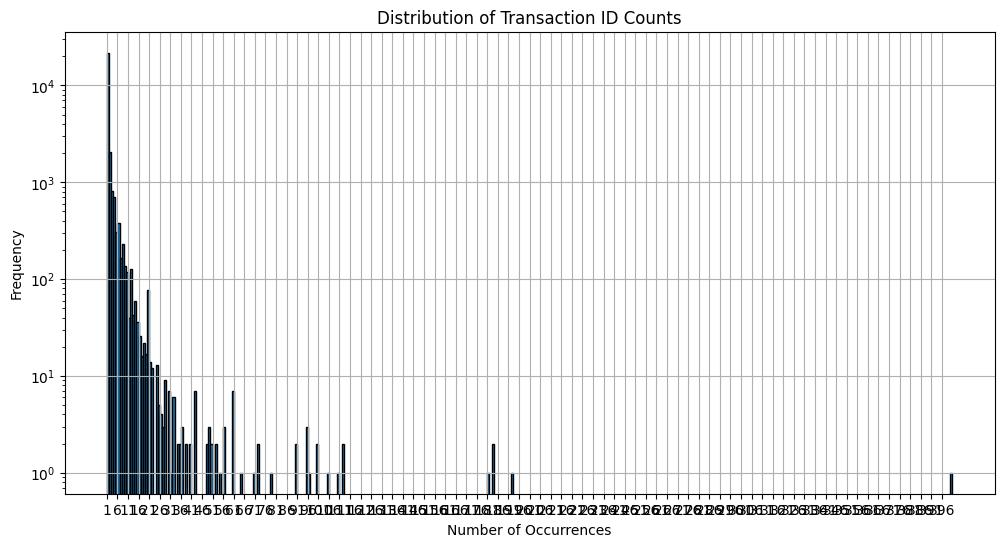

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the value counts of transaction_id
transaction_id_counts = location_df['transaction_id'].value_counts()

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(transaction_id_counts, bins=range(1, transaction_id_counts.max()+2), edgecolor='black')
plt.title('Distribution of Transaction ID Counts')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.xticks(range(1, transaction_id_counts.max()+1, 5))  # Adjusting xticks for readability
plt.yscale('log')  # Log scale for better readability
plt.grid(True)
plt.show()


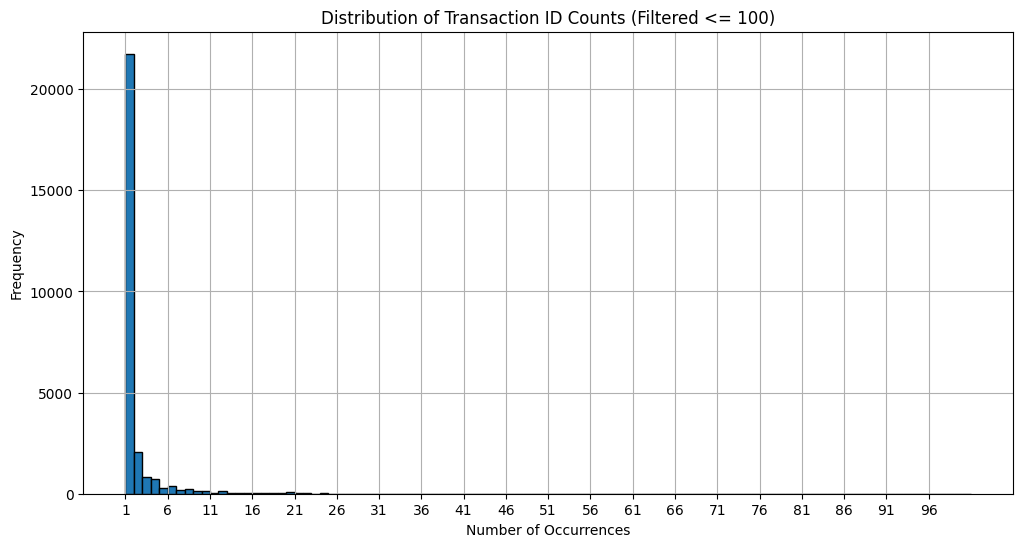

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming location_df is already defined and contains the transaction_id data

# Calculate the value counts of transaction_id
transaction_id_counts = location_df['transaction_id'].value_counts()

# Filter the counts to be <= 200 for better readability
filtered_counts = transaction_id_counts[transaction_id_counts <= 100]

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_counts, bins=range(1, filtered_counts.max()+2), edgecolor='black')
plt.title('Distribution of Transaction ID Counts (Filtered <= 100)')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.xticks(range(1, filtered_counts.max()+1, 5))  # Adjusting xticks for readability
plt.grid(True)
plt.show()


#### summary

Most of the transactions only inlove one drop-out and one take-up locations.

I'd like to see the numbers of contianers that were being transported on each trade and location

### 1.1.2 Most Common Pickup and Dropoff Locations(Top 5)

#### top 5 cities, countries and regions by charts

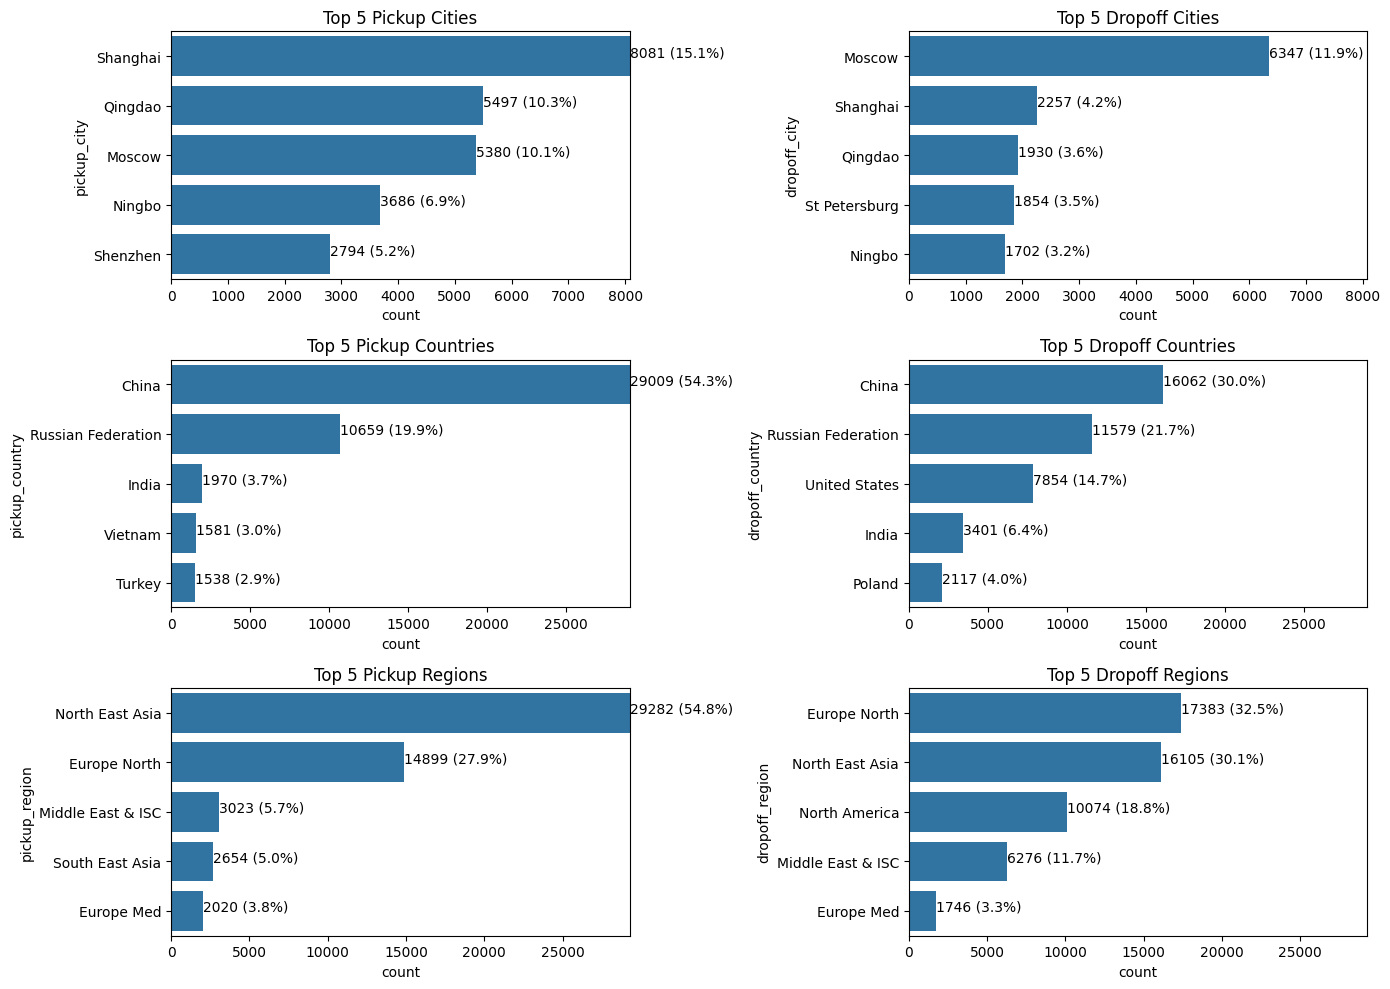

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate overall percentages
def calculate_overall_percentage(df, column, overall_sum):
    df['percentage'] = (df[column] / overall_sum) * 100
    return df

# Overall counts for calculating percentages
overall_pickup_cities_count = location_df['pickup_city'].value_counts().sum()
overall_dropoff_cities_count = location_df['dropoff_city'].value_counts().sum()
overall_pickup_countries_count = location_df['pickup_country'].value_counts().sum()
overall_dropoff_countries_count = location_df['dropoff_country'].value_counts().sum()
overall_pickup_regions_count = location_df['pickup_region'].value_counts().sum()
overall_dropoff_regions_count = location_df['dropoff_region'].value_counts().sum()

# Most common pickup and dropoff cities
common_pickup_cities = location_df['pickup_city'].value_counts().head().reset_index()
common_pickup_cities.columns = ['pickup_city', 'count']
common_pickup_cities = calculate_overall_percentage(common_pickup_cities, 'count', overall_pickup_cities_count)

common_dropoff_cities = location_df['dropoff_city'].value_counts().head().reset_index()
common_dropoff_cities.columns = ['dropoff_city', 'count']
common_dropoff_cities = calculate_overall_percentage(common_dropoff_cities, 'count', overall_dropoff_cities_count)

# Most common pickup and dropoff countries
common_pickup_countries = location_df['pickup_country'].value_counts().head().reset_index()
common_pickup_countries.columns = ['pickup_country', 'count']
common_pickup_countries = calculate_overall_percentage(common_pickup_countries, 'count', overall_pickup_countries_count)

common_dropoff_countries = location_df['dropoff_country'].value_counts().head().reset_index()
common_dropoff_countries.columns = ['dropoff_country', 'count']
common_dropoff_countries = calculate_overall_percentage(common_dropoff_countries, 'count', overall_dropoff_countries_count)

# Most common pickup and dropoff regions
common_pickup_regions = location_df['pickup_region'].value_counts().head().reset_index()
common_pickup_regions.columns = ['pickup_region', 'count']
common_pickup_regions = calculate_overall_percentage(common_pickup_regions, 'count', overall_pickup_regions_count)

common_dropoff_regions = location_df['dropoff_region'].value_counts().head().reset_index()
common_dropoff_regions.columns = ['dropoff_region', 'count']
common_dropoff_regions = calculate_overall_percentage(common_dropoff_regions, 'count', overall_dropoff_regions_count)

# Calculate maximum counts for each row of plots
max_count_cities = max(common_pickup_cities['count'].max(), common_dropoff_cities['count'].max())
max_count_countries = max(common_pickup_countries['count'].max(), common_dropoff_countries['count'].max())
max_count_regions = max(common_pickup_regions['count'].max(), common_dropoff_regions['count'].max())

# Plot the results with consistent x-scale within each row
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.barplot(data=common_pickup_cities, x='count', y='pickup_city')
for index, row in common_pickup_cities.iterrows():
    plt.text(row['count'], index, f'{row["count"]} ({row["percentage"]:.1f}%)', color='black', ha="left")
plt.xlim(0, max_count_cities)
plt.title('Top 5 Pickup Cities')

plt.subplot(3, 2, 2)
sns.barplot(data=common_dropoff_cities, x='count', y='dropoff_city')
for index, row in common_dropoff_cities.iterrows():
    plt.text(row['count'], index, f'{row["count"]} ({row["percentage"]:.1f}%)', color='black', ha="left")
plt.xlim(0, max_count_cities)
plt.title('Top 5 Dropoff Cities')

plt.subplot(3, 2, 3)
sns.barplot(data=common_pickup_countries, x='count', y='pickup_country')
for index, row in common_pickup_countries.iterrows():
    plt.text(row['count'], index, f'{row["count"]} ({row["percentage"]:.1f}%)', color='black', ha="left")
plt.xlim(0, max_count_countries)
plt.title('Top 5 Pickup Countries')

plt.subplot(3, 2, 4)
sns.barplot(data=common_dropoff_countries, x='count', y='dropoff_country')
for index, row in common_dropoff_countries.iterrows():
    plt.text(row['count'], index, f'{row["count"]} ({row["percentage"]:.1f}%)', color='black', ha="left")
plt.xlim(0, max_count_countries)
plt.title('Top 5 Dropoff Countries')

plt.subplot(3, 2, 5)
sns.barplot(data=common_pickup_regions, x='count', y='pickup_region')
for index, row in common_pickup_regions.iterrows():
    plt.text(row['count'], index, f'{row["count"]} ({row["percentage"]:.1f}%)', color='black', ha="left")
plt.xlim(0, max_count_regions)
plt.title('Top 5 Pickup Regions')

plt.subplot(3, 2, 6)
sns.barplot(data=common_dropoff_regions, x='count', y='dropoff_region')
for index, row in common_dropoff_regions.iterrows():
    plt.text(row['count'], index, f'{row["count"]} ({row["percentage"]:.1f}%)', color='black', ha="left")
plt.xlim(0, max_count_regions)
plt.title('Top 5 Dropoff Regions')

plt.tight_layout()
plt.show()


#### top 5 cities, countries and regions by heatmap

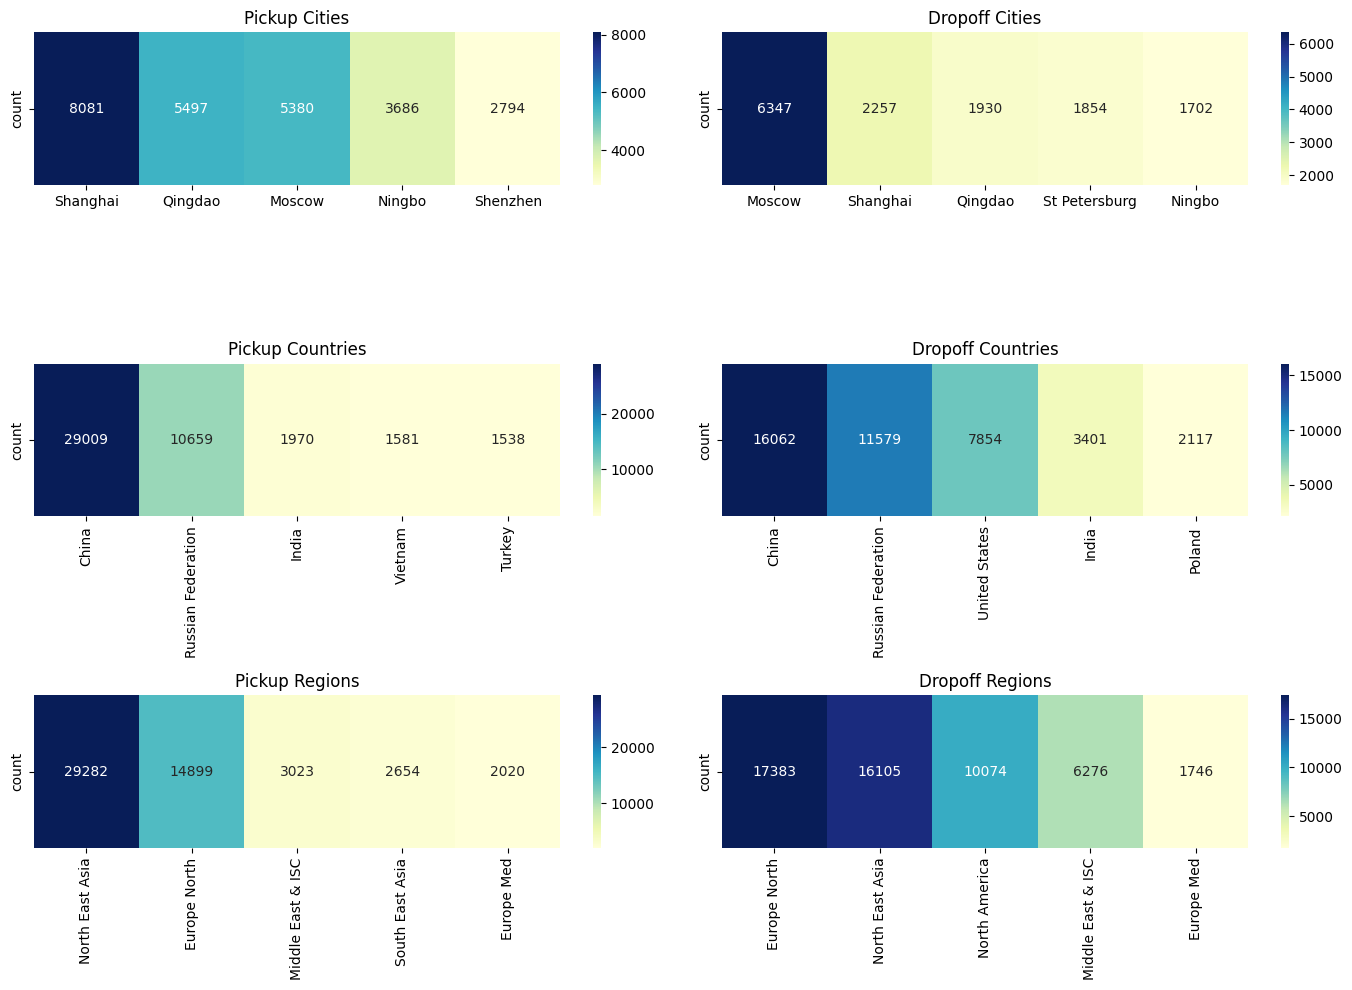

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the same data structure and counts as before
common_pickup_cities = location_df['pickup_city'].value_counts().head().reset_index()
common_pickup_cities.columns = ['pickup_city', 'count']

common_dropoff_cities = location_df['dropoff_city'].value_counts().head().reset_index()
common_dropoff_cities.columns = ['dropoff_city', 'count']

common_pickup_countries = location_df['pickup_country'].value_counts().head().reset_index()
common_pickup_countries.columns = ['pickup_country', 'count']

common_dropoff_countries = location_df['dropoff_country'].value_counts().head().reset_index()
common_dropoff_countries.columns = ['dropoff_country', 'count']

common_pickup_regions = location_df['pickup_region'].value_counts().head().reset_index()
common_pickup_regions.columns = ['pickup_region', 'count']

common_dropoff_regions = location_df['dropoff_region'].value_counts().head().reset_index()
common_dropoff_regions.columns = ['dropoff_region', 'count']

# Heatmap data preparation
heatmap_data = {
    'Pickup Cities': common_pickup_cities.set_index('pickup_city').T,
    'Dropoff Cities': common_dropoff_cities.set_index('dropoff_city').T,
    'Pickup Countries': common_pickup_countries.set_index('pickup_country').T,
    'Dropoff Countries': common_dropoff_countries.set_index('dropoff_country').T,
    'Pickup Regions': common_pickup_regions.set_index('pickup_region').T,
    'Dropoff Regions': common_dropoff_regions.set_index('dropoff_region').T
}

# Plot the heatmaps
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

for ax, (title, data) in zip(axes.flatten(), heatmap_data.items()):
    sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


#### top 5 cities on a map

In [88]:
import folium
import pandas as pd

# Coordinates for the cities
city_coordinates = {
    'Shanghai': (31.2304, 121.4737),
    'Qingdao': (36.0671, 120.3826),
    'Moscow': (55.7558, 37.6173),
    'Ningbo': (29.8683, 121.5440),
    'Shenzhen': (22.5431, 114.0579),
    'St Petersburg': (59.9343, 30.3351)
}

# Data for the most common pickup cities
pickup_cities = pd.DataFrame({
    'city': ['Shanghai', 'Qingdao', 'Moscow', 'Ningbo', 'Shenzhen'],
    'count': [8081, 5497, 5380, 3686, 2794]
})
pickup_cities['coords'] = pickup_cities['city'].map(city_coordinates)

# Data for the most common dropoff cities
dropoff_cities = pd.DataFrame({
    'city': ['Moscow', 'Shanghai', 'Qingdao', 'St Petersburg', 'Ningbo'],
    'count': [6347, 2257, 1930, 1854, 1702]
})
dropoff_cities['coords'] = dropoff_cities['city'].map(city_coordinates)

# Create a folium map for cities
m_cities = folium.Map(location=[20, 0], zoom_start=2)

# Add pickup locations in blue
for _, row in pickup_cities.iterrows():
    folium.CircleMarker(
        location=row['coords'],
        radius=row['count'] / 500,  # Adjust size for better visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['city']} (Pickups: {row['count']})"
    ).add_to(m_cities)

# Add dropoff locations in red
for _, row in dropoff_cities.iterrows():
    folium.CircleMarker(
        location=row['coords'],
        radius=row['count'] / 500,  # Adjust size for better visibility
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['city']} (Dropoffs: {row['count']})"
    ).add_to(m_cities)

# Add Title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Most Common Pickup and Dropoff Cities</b></h3>
             '''
m_cities.get_root().html.add_child(folium.Element(title_html))

# Add Legend
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp; Pickup Locations <br>
     &nbsp; <i class="fa fa-circle" style="color:red"></i>&nbsp; Dropoff Locations
     </div>
     '''
m_cities.get_root().html.add_child(folium.Element(legend_html))

# Display the map for cities
m_cities.save('common_pickup_dropoff_cities.html')
m_cities


#### top 5 countries on a map

In [89]:
import folium
import pandas as pd

# Coordinates for the countries (approximate central coordinates)
country_coordinates = {
    'China': (35.8617, 104.1954),
    'Russian Federation': (61.5240, 105.3188),
    'India': (20.5937, 78.9629),
    'Vietnam': (14.0583, 108.2772),
    'Turkey': (38.9637, 35.2433),
    'United States': (37.0902, -95.7129),
    'Poland': (51.9194, 19.1451)
}

# Data for the most common pickup countries
pickup_countries = pd.DataFrame({
    'country': ['China', 'Russian Federation', 'India', 'Vietnam', 'Turkey'],
    'count': [29009, 10659, 1970, 1581, 1538]
})
pickup_countries['coords'] = pickup_countries['country'].map(country_coordinates)

# Data for the most common dropoff countries
dropoff_countries = pd.DataFrame({
    'country': ['China', 'Russian Federation', 'United States', 'India', 'Poland'],
    'count': [16062, 11579, 7854, 3401, 2117]
})
dropoff_countries['coords'] = dropoff_countries['country'].map(country_coordinates)

# Create a folium map for countries
m_countries = folium.Map(location=[20, 0], zoom_start=2)

# Add pickup locations in blue with larger and more obvious sizes
for _, row in pickup_countries.iterrows():
    folium.CircleMarker(
        location=row['coords'],
        radius=row['count'] / 1000 + 5,  # Adjust size for better visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['country']} (Pickups: {row['count']})"
    ).add_to(m_countries)

# Add dropoff locations in red with larger and more obvious sizes
for _, row in dropoff_countries.iterrows():
    folium.CircleMarker(
        location=row['coords'],
        radius=row['count'] / 1000 + 5,  # Adjust size for better visibility
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['country']} (Dropoffs: {row['count']})"
    ).add_to(m_countries)

# Add Title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Most Common Pickup and Dropoff Countries</b></h3>
             '''
m_countries.get_root().html.add_child(folium.Element(title_html))

# Add Legend
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp; Pickup Locations <br>
     &nbsp; <i class="fa fa-circle" style="color:red"></i>&nbsp; Dropoff Locations
     </div>
     '''
m_countries.get_root().html.add_child(folium.Element(legend_html))

# Display the map for countries
m_countries.save('common_pickup_dropoff_countries.html')
m_countries


#### top 5 regions on a map

In [90]:
# Coordinates for the regions (approximate central coordinates)
region_coordinates = {
    'North East Asia': (39.9042, 116.4074),
    'Europe North': (55.7558, 37.6173),
    'Middle East & ISC': (25.276987, 55.296249),
    'South East Asia': (1.3521, 103.8198),
    'Europe Med': (41.9028, 12.4964),
    'North America': (37.0902, -95.7129)
}

# Data for the most common pickup regions
pickup_regions = pd.DataFrame({
    'region': ['North East Asia', 'Europe North', 'Middle East & ISC', 'South East Asia', 'Europe Med'],
    'count': [29282, 14899, 3023, 2654, 2020]
})
pickup_regions['coords'] = pickup_regions['region'].map(region_coordinates)

# Data for the most common dropoff regions
dropoff_regions = pd.DataFrame({
    'region': ['Europe North', 'North East Asia', 'North America', 'Middle East & ISC', 'Europe Med'],
    'count': [17383, 16105, 10074, 6276, 1746]
})
dropoff_regions['coords'] = dropoff_regions['region'].map(region_coordinates)

# Create a folium map for regions
m_regions = folium.Map(location=[20, 0], zoom_start=2)

# Add pickup locations in blue with larger and more obvious sizes
for _, row in pickup_regions.iterrows():
    folium.CircleMarker(
        location=row['coords'],
        radius=row['count'] / 2000 + 5,  # Adjust size for better visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['region']} (Pickups: {row['count']})"
    ).add_to(m_regions)

# Add dropoff locations in red with larger and more obvious sizes
for _, row in dropoff_regions.iterrows():
    folium.CircleMarker(
        location=row['coords'],
        radius=row['count'] / 2000 + 5,  # Adjust size for better visibility
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['region']} (Dropoffs: {row['count']})"
    ).add_to(m_regions)

# Add Title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Most Common Pickup and Dropoff Regions</b></h3>
             '''
m_regions.get_root().html.add_child(folium.Element(title_html))

# Add Legend
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp; Pickup Locations <br>
     &nbsp; <i class="fa fa-circle" style="color:red"></i>&nbsp; Dropoff Locations
     </div>
     '''
m_regions.get_root().html.add_child(folium.Element(legend_html))

# Display the map for regions
m_regions.save('common_pickup_dropoff_regions.html')
m_regions


#### international trade chokepoints

In [91]:
import folium

# Coordinates for sea chokepoints
sea_chokepoints = {
    'Strait of Hormuz': (26.5667, 56.2500),
    'Suez Canal': (30.5852, 32.2989),
    'Panama Canal': (9.0800, -79.6800),
    'Strait of Malacca': (2.5500, 101.1000),
    'Bosporus': (41.1000, 29.0500),
    'Dardanelles': (40.2000, 26.4000),
    'Bab-el-Mandeb': (12.7000, 43.2000),
    'Cape of Good Hope': (-34.3500, 18.4750),
    'Kiel Canal': (54.3686, 9.7075),
    'Lombok Strait': (-8.566, 115.5),
    'Strait of Gibraltar': (35.974, -5.335),
    'Strait of Magellan': (-53.1625, -70.9091),
    'Makassar Strait': (-1.0, 118.0),
    'Torres Strait': (-10.5, 142.2),
    'Northern Sea Route': (75.0, 135.0),  # Approximate midpoint of the route
    'Northwest Passage': (75.0, -100.0),  # Approximate midpoint of the route
    'Sea of Japan': (37.5, 137.0),  # Approximate location
    'Taiwan Strait': (24.0, 120.5)  # Approximate location
}

# Coordinates for land chokepoints
land_chokepoints = {
    'Khyber Pass': (34.2000, 71.1000),
    'Silk Road Route': (39.0000, 104.0000),
    'Brenner Pass': (47.0000, 11.5000),
    'Karakoram Highway': (36.0000, 75.0000),
    'Trans-Siberian Railway': (55.7500, 37.6167),
    'Caspian Corridor': (40.0, 50.0),
    'Tijuana Border Crossing': (32.5411, -117.0382),
    'Friendship Bridge': (40.1117, 124.3914),
    'Manchurian Route': (42.0, 129.0),
    'Eurasian Land Bridge': (48.0, 60.0)
}

# Create a folium map
m_chokepoints = folium.Map(location=[20, 0], zoom_start=2)

# Add sea chokepoints markers
for name, coord in sea_chokepoints.items():
    folium.Marker(
        location=coord,
        popup=name,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m_chokepoints)

# Add land chokepoints markers
for name, coord in land_chokepoints.items():
    folium.Marker(
        location=coord,
        popup=name,
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(m_chokepoints)

# Add Title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>International Trade Chokepoints</b></h3>
             '''
m_chokepoints.get_root().html.add_child(folium.Element(title_html))

# Add Legend
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp; Sea Chokepoints <br>
     &nbsp; <i class="fa fa-circle" style="color:green"></i>&nbsp; Land Chokepoints
     </div>
     '''
m_chokepoints.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m_chokepoints.save('international_trade_chokepoints_extended_with_legend.html')
m_chokepoints


#### summary 1

**Operational Risk** during transportation

The types of accidents and risks, which happen to container during transportation on different trading routes and different shipping methods, can vary greatly.

For example, a container passing through red sea faces a greater risk towards hijacking. A container transported by sea has a larger probability of delayment than one transported on land.

Even though the data on location cities and countries can offer some information on such matter, it won't be specific enough. For instance, a container can be transport from Shanghai to Saint Petersburg either by sea or landbridge. With the opening of Northern Sea Route in recent years, the maritime route from east Asia to Europe can also be very different.

**Add-ons on data collection**

I propose that two more types of information being added to the mix:

1. **Transportation Methods**: in what way the containers are being transported.

   
   * By land:
     
         - Truck
         - Railway
        <br>

   * By water:
     
         - Sea
         - Inland canals and rivers

     <br>
     

2. **Important Trading choke points**: not every chokepoint is import, so I list a few examples I think that might influence the risks

   * panama canal : this canal heavily depends on local rainfall to operate and usually congested, containers passing through here have a higher possibility of delayment.
   * Bab-el-Mandeb and Strait of Hormuz :  in both loaction, containers have an increased chance of getting damaged or destoryed due to regional conflicts
   * Cape of Good Hope : some ships are too large for suez canal. By routing through Cape of Good Hope, they are facing more extreme weather and bigger waves, runing a higher risk of delayment and losing containers at sea
  

**improvement on models** which predicts how likely is this transaction going to have issues, such as delayment

There should be a model to measure how likey the transactions would go wrong, such as delayment, lost or damaged. And on the operation risk side, many things can happen to a container. A model developed with no add-on features and one with can be used in a A/B test to validate the new features and theories.

#### summary 2

**Market Risk** and **Geopolitical Risk** over-dependency on Russian and Chinese markets

1. Market Risk:

    - Volatility: Markets can be volatile, and if a company’s portfolio is heavily concentrated in one or two markets, fluctuations in those markets can have a significant impact on the company's financial performance.
    - Economic Downturns: A downturn in a specific market can lead to significant losses. For example, Container Xchange must have been effected by container shortage due to China's lockdown in 2022, an industry-wide downturn can severely affect its portfolio.
   
      <br>
  
   
2. Geopolitical Risk:

    - Political Instability: Concentration in markets that are prone to political instability can lead to sudden and unpredictable changes affecting investments, such as nationalization, expropriation, or changes in regulatory environments. The Russo-Ukrainian War and the sactions came after that would likely heavily impact the Russian market. And one big concern for the company is whether Container Xchange has unknowling added Russian War efforts by assiting the trade between China and Russia.
    - Regulatory Changes: Markets can be affected by changes in laws and regulations. Heavy concentration means that adverse regulatory changes in that market can have a disproportionate impact.
  
      <br>
  
3. Diversification:
   
   - Spread investments across different markets to reduce exposure to any single market.
   - South Asia and South East Asia are the new rising manufacturer hub, it would be a good idea for the company to focus on exploiting new markets in such areas.

## 1.2 transaction data analysis

In [92]:
## Data Import and Initial Exploration
import pandas as pd
from sqlalchemy import create_engine

# Create SQLite engine
engine = create_engine('sqlite:///risk_dataset.db')
transaction_df = pd.read_sql('SELECT * FROM transaction_data', engine, index_col='transaction_id')


In [93]:
transaction_df.head()

,supplier_company_id,user_company_id,pickup_charge_payer_role,status,free_days_count,container_type,container_condition,container_count,price_per_container,picked_up_container_count,...,min_pickup_date,max_pickup_date,min_dropped_off_date,max_dropped_off_date,days_to_pay,puc_payment_ratio,amount,replacement_value,per_diem,invoice_status
transaction_id,,,,,,,,,,,,,,,,,,,,,
73327,80,516,user,completed,0.0,forty_high_cube,cargo_worthy,1.0,None,NaN,...,2023-06-08,2023-06-29,None,None,NaN,not paid,NaN,0.0,0.00,None
92363,523,314,user,completed,0.0,forty_high_cube,cargo_worthy,10.0,None,0.0,...,2023-10-20,2023-10-20,None,None,NaN,not paid,NaN,4500.0,3.00,None
154424,3235,435,supplier,completed,150.0,forty_high_cube,cargo_worthy,86.0,None,86.0,...,2021-10-13,2021-10-28,2022-01-08,2023-06-30,-7.0,fully paid,457888.14,7000.0,4.00,1-paid
186305,1758,1876,user,completed,60.0,twenty_dry_container,cargo_worthy,1.0,None,1.0,...,2022-05-04,2022-05-04,2022-08-14,2022-08-14,3.5,fully paid,345938.73,4000.0,5.00,1-paid
192884,163,1004,user,completed,14.0,forty_high_cube,iicl,10.0,None,10.0,...,2022-06-16,2022-08-17,2023-08-31,2023-08-31,NaN,not paid,NaN,5400.0,4.75,None


In [94]:
container_summary = transaction_df.groupby('container_type')['container_count'].sum()

# Display the result
print(container_summary)

container_type
forty_dry_container                   280.0
forty_five_high_cube                    2.0
forty_five_high_cube_pallet_wide        8.0
forty_flatrack                         54.0
forty_hard_top                          3.0
forty_high_cube                     16794.0
forty_high_cube_double_door            51.0
forty_high_cube_open_top                1.0
forty_high_cube_side_door              75.0
forty_open_top                         26.0
forty_reefer                            1.0
forty_side_door                         2.0
twenty_double_door                     10.0
twenty_dry_container                 6967.0
twenty_flatrack                         5.0
twenty_high_cube                      183.0
twenty_high_cube_double_door           60.0
twenty_open_top                         8.0
twenty_reefer                           5.0
twenty_side_door                      104.0
Name: container_count, dtype: float64


In [95]:
container_summary = transaction_df.groupby('container_condition')['container_count'].sum()

# Display the result
print(container_summary)

container_condition
brand_new        7290.0
cargo_worthy    13769.0
foodgrade          13.0
iicl             3439.0
iicl-5             28.0
iicl-6             88.0
wwt                12.0
Name: container_count, dtype: float64


## 1.3 User data analysis

In [96]:
import pandas as pd
from sqlalchemy import create_engine

# Create SQLite engine
engine = create_engine('sqlite:///risk_dataset.db')

# Load datasets from SQL database
user_df = pd.read_sql('SELECT * FROM user', engine)
transaction_df = pd.read_sql('SELECT * FROM transaction_data', engine)

# Count transactions where the company is the supplier
supplier_counts = transaction_df['supplier_company_id'].value_counts().reset_index()
supplier_counts.columns = ['company_id', 'supplier_transaction_count']

# Count transactions where the company is the user
user_counts = transaction_df['user_company_id'].value_counts().reset_index()
user_counts.columns = ['company_id', 'user_transaction_count']

# Merge the counts with the user DataFrame
user_df = user_df.merge(supplier_counts, on='company_id', how='left')
user_df = user_df.merge(user_counts, on='company_id', how='left')



###
# Fill NaN values with 0 (in case some companies have no transactions)

user_df['supplier_transaction_count'] = user_df['supplier_transaction_count'].fillna(0)
user_df['user_transaction_count'] = user_df['user_transaction_count'].fillna(0)
user_df['total_transaction_count'] = user_df['supplier_transaction_count'] + user_df['user_transaction_count']

# Display the first few rows of the updated user DataFrame
user_df.head()

,company_id,signup_date,failure_score_assessment,delinquincy_score_assessment,overall_risk_assessment,platform_access,city,country,region,user_count,unit_limit,credit_limit,supplier_transaction_count,user_transaction_count,total_transaction_count
0,1,26/05/2015,None,None,None,NO ACCESS,Singapore,Singapore,South East Asia,4.0,0,0.0,0.0,0.0,0.0
1,2,9/01/2019,None,None,None,NO ACCESS,Marseille cedex 02,France,Europe North,33.0,0,0.0,0.0,0.0,0.0
2,3,26/05/2015,None,None,None,NO ACCESS,Seoul,South Korea,Oceania,NaN,0,0.0,0.0,0.0,0.0
3,4,26/05/2015,None,None,None,LEASING ONLY,Seoul,South Korea,Oceania,17.0,10,-30000.0,0.0,0.0,0.0
4,5,29/06/2016,None,None,None,NO ACCESS,Singapore,Singapore,South East Asia,5.0,0,0.0,0.0,0.0,0.0


In [97]:
no_access_users_df = pd.read_sql("SELECT * FROM user WHERE platform_access = 'NO ACCESS'", engine)
no_access_users_df

,company_id,signup_date,failure_score_assessment,delinquincy_score_assessment,overall_risk_assessment,platform_access,city,country,region,user_count,unit_limit,credit_limit
0,1,26/05/2015,None,None,None,NO ACCESS,Singapore,Singapore,South East Asia,4.0,0,0.0
1,2,9/01/2019,None,None,None,NO ACCESS,Marseille cedex 02,France,Europe North,33.0,0,0.0
2,3,26/05/2015,None,None,None,NO ACCESS,Seoul,South Korea,Oceania,NaN,0,0.0
3,5,29/06/2016,None,None,None,NO ACCESS,Singapore,Singapore,South East Asia,5.0,0,0.0
4,6,24/05/2017,None,None,None,NO ACCESS,Singapore,Singapore,South East Asia,6.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2934,10705,22/04/2024,None,None,None,NO ACCESS,Istanbul,Turkey,Europe Med,NaN,0,0.0
2935,10711,24/04/2024,None,None,None,NO ACCESS,Xi'an,China,North East Asia,NaN,0,0.0
2936,10716,25/04/2024,None,None,None,NO ACCESS,Airoli,India,Middle East & ISC,1.0,0,0.0
2937,10729,29/04/2024,None,None,moderate,NO ACCESS,Chittagong,Bangladesh,Middle East & ISC,NaN,0,0.0


In [98]:
user_df['failure_score_assessment'].value_counts()

failure_score_assessment
Unavailable                                                                                          402
low-moderate                                                                                         159
moderate                                                                                             159
moderate-high                                                                                        158
Undetermined                                                                                          92
Moderate risk of severe financial stress, such as a bankruptcy, over the next 12 months.              85
Moderate to high risk of  severe financial stress, such as a bankruptcy, over the next 12 months.     70
low                                                                                                   63
high                                                                                                  23
Out of Business               

In [99]:
user_df['overall_risk_assessment'].value_counts()

overall_risk_assessment
high             899
moderate-high    257
moderate         220
low-moderate     159
low               71
Name: count, dtype: int64

In [100]:
### user with transaction history

user_df_trans_his = user_df[user_df['total_transaction_count'] != 0].copy()
user_df_trans_his

,company_id,signup_date,failure_score_assessment,delinquincy_score_assessment,overall_risk_assessment,platform_access,city,country,region,user_count,unit_limit,credit_limit,supplier_transaction_count,user_transaction_count,total_transaction_count
6,8,1/07/2019,None,None,None,ALL ACCESS,Haifa,Israel,Middle East & ISC,22.0,1663,-15000.0,3.0,0.0,3.0
16,21,9/07/2018,low-moderate,Unavailable,low-moderate,ALL ACCESS,Rotterdam,Netherlands,Europe North,26.0,58,-10000.0,6.0,0.0,6.0
23,28,4/03/2016,low-moderate,Unavailable,low-moderate,LEASING ONLY,Mumbai,India,Middle East & ISC,10.0,728,-30000.0,13.0,5.0,18.0
54,59,7/09/2016,None,None,None,ALL ACCESS,Taastrup,Denmark,Europe North,8.0,22,-10000.0,9.0,0.0,9.0
75,80,25/01/2017,low,Unavailable,low,ALL ACCESS,Helsinki,Finland,Europe North,21.0,106,-200000.0,52.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,10360,5/01/2024,None,None,None,ALL ACCESS,Seoul,South Korea,Oceania,1.0,22,-10000.0,1.0,0.0,1.0
4736,10389,11/01/2024,Moderate to high risk of severe financial str...,High risk of severe payment delinquency over n...,moderate-high,LEASING ONLY,Gretna,United States,North America,2.0,20,-10000.0,0.0,1.0,1.0
4739,10396,12/01/2024,None,None,high,LEASING ONLY,Shenzhen,China,North East Asia,1.0,31,-10000.0,0.0,2.0,2.0
4743,10412,16/01/2024,None,None,high,NO ACCESS,SHANGHAI,China,North East Asia,1.0,20,-10000.0,0.0,2.0,2.0


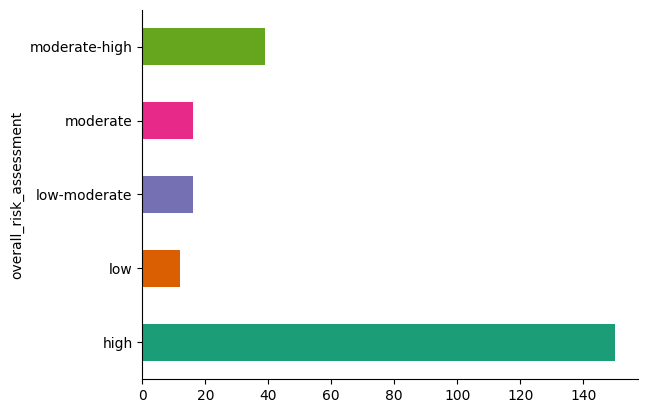

In [101]:
from matplotlib import pyplot as plt
import seaborn as sns
user_df_trans_his.groupby('overall_risk_assessment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

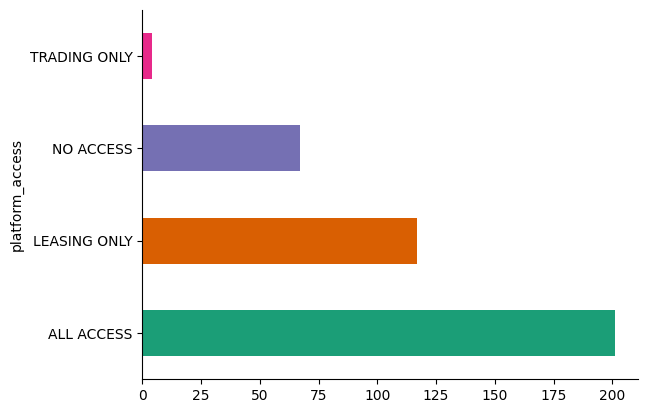

In [102]:
from matplotlib import pyplot as plt
import seaborn as sns
user_df_trans_his.groupby('platform_access').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

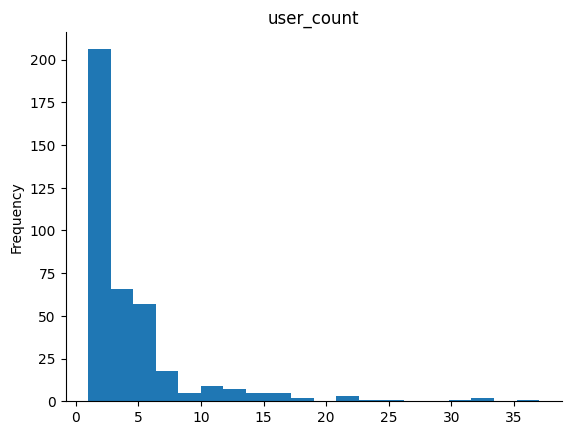

In [103]:
from matplotlib import pyplot as plt
user_df_trans_his['user_count'].plot(kind='hist', bins=20, title='user_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Summary

### **Default Risk** derived from the ambiguity of D&B company ratings.

According to your email and my previous work experience as an underwriter for trade finance, there are three situations where D&B company ratings can be NaN in the table:

1. **Client is on D&B and has D&B company ratings but not available to us**:
   - The ratings exist, but we don't have access to them.

2. **Client is on D&B but D&B has no ratings**:
   - The client is listed, but no ratings have been assigned by D&B.

3. **Client is not on D&B at all**:
   - The client is not listed in the D&B database.

Even though we don't have the ratings in all three cases, the risks and situations can be vastly different under these conditions.

A client being on D&B information might already imply that it has more reputation and accessibility than one that is not.

### Implications for Risk Assessment

Understanding the nuances between these situations is crucial for accurate risk assessment. Here’s how we can interpret and manage the risks associated with each scenario:

1. **Client is on D&B and has ratings but not available to us**:
   - **Risk Implication**: The client might have a track record, but the unavailability of ratings could suggest potential issues in transparency or accessibility.
   - **Action**: Further investigation is needed. Engage directly with D&B or the client to obtain the missing ratings and assess their financial health and credibility.

2. **Client is on D&B but has no ratings**:
   - **Risk Implication**: The absence of ratings might indicate that the client is relatively new, has limited financial activities, or D&B has insufficient data to rate them.
   - **Action**: Perform an internal risk assessment using other available data sources such as financial statements, trade references, and credit histories. Additionally, consider monitoring their future activities and periodically reassessing their risk profile.

3. **Client is not on D&B at all**:
   - **Risk Implication**: This could be a red flag, indicating the client might be small, new, or operating in a less formal capacity. It could also mean limited information availability.
   - **Action**: Conduct thorough due diligence by gathering data from alternative sources. This could include industry reports, direct interviews, third-party verifications, and leveraging any available internal data. Establish stringent risk mitigation strategies such as requiring higher collateral or guarantees.

### Conclusion

By recognizing the different scenarios and their associated risks, we can implement tailored strategies to manage default risks effectively. Proper identification and assessment of these cases will enhance our risk management framework, ensuring better decision-making and safeguarding against potential financial losses.


### Extra - A Reliable Credit Provider for Mainland China - Gladtrust(Information from my last work experience and gathered online)

From my previous experience, I have observed that foreign credit agencies often do not have a comprehensive understanding of the credit situation in mainland China. This is where Gladtrust can play a significant role.

Their services include:

- **Credit Reports**: Providing detailed credit reports to help businesses mitigate risk.
- **Credit Monitoring**: Keeping clients informed about changes in their partners' financial status.
- **Debt Collection**: Offering a "no collection, no fee" debt recovery service.
- **Database Products**: Supplying tailored data products to meet specific customer needs.

With over 10,000 customers in more than 50 countries, Gladtrust has established itself as a reliable partner for businesses looking to navigate the complex credit landscape in China.

For more information, you can visit their [official website](http://www.gladtrust.com/aboutus/profile)



## 1.4 A proposal for LLM based news alert for risk management

LLMs for innovation and technology intelligence: news categorization and trend signal detection


https://medium.com/mapegy-tech/llms-for-innovation-and-technology-intelligence-news-categorization-and-trend-signal-detection-ec4171627937

# 2.Probability of Default (PD) Model Using Logistic Regression

## 2.1 setting up necessary libraries

In [104]:
!pip install scikit-learn

## 2.2 existing researches on mortgage default

 ### **Key Factors Influencing Default**
1. **Credit Score**: Borrowers with lower credit scores are at a higher risk of default.
2. **Loan-to-Value (LTV) Ratio**: Higher LTV ratios increase the probability of negative equity, leading to higher default risk.
3. **Debt-to-Income (DTI) Ratio**: Higher DTI ratios indicate that borrowers are more financially stretched, increasing default risk.
4. **Employment Status and Income Level**: Stable employment and higher income levels are associated with lower default risk.
5. **Economic Conditions**: Regional economic conditions and housing market trends significantly impact default rates.
6. **Previous Defaults**: A history of previous defaults increases the likelihood of future defaults.

 ### **citations**

1. Office of the Comptroller of the Currency (OCC). "Default Probability and Loss Given Default for Home Equity Loans." Economics Working Paper 2014-1, June 2014. Available at: https://www.occ.gov/publications/publications-by-type/economics-working-papers/2014/working-paper-2014-1.html.

2. Bajari, P., Chu, C. S., & Park, M. "An Empirical Model of Subprime Mortgage Default from 2000 to 2007." NBER Working Paper No. 14625, National Bureau of Economic Research, 2008. Available at: https://www.nber.org/system/files/working_papers/w17516/w17516.pdf.

3. Do, H. X., Rösch, D., & Scheule, H. "Liquidity Constraints, Home Equity and Residential Mortgage Losses." The Journal of Real Estate Finance and Economics, vol. 61, no. 2, 2020, pp. 208-246. Reserve Bank of Australia. Available at: https://www.rba.gov.au/publications/rdp/2020/pdf/rdp2020-03.pdf.

4. Elul, R., Souleles, N. S., Chomsisengphet, S., Glennon, D., & Hunt, R. "What 'Triggers' Mortgage Default?" The American Economic Review, vol. 100, no. 2, 2010, pp. 490-494.

## 2.3 load data from the SQL database

In [105]:
## Data Import and Initial Exploration
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

# Create SQLite engine
engine = create_engine('sqlite:///risk_dataset.db')

# Load dataset from SQL database
equity_loan_df = pd.read_sql('SELECT * FROM equity_loan', engine, index_col='equity_loan_id')

# Display first few rows
print("Equity Loan Dataset")
equity_loan_df.head()

Equity Loan Dataset


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
equity_loan_id,,,,,,,,,,,,,
1,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
2,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
3,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
4,1,1500.0,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


## 2.4 data description and clean-up

### 2.4.1 data scription

 #### **1. relevant entry for PD estimation**

(1) **Credit Score:**   
CLAGE: Age of oldest credit line in months

(2) **Loan-to-Value (LTV) Ratio:**

LOAN: Amount of the loan request

MORTDUE: Amount due on existing mortgage

VALUE: Value of current property


(3) **Debt-to-Income (DTI) Ratio:**

DEBTINC: Debt-to-income ratio

(4) **Employment Status and Income Level:**

JOB: Occupational categories

YOJ: Years at present job

(5)**Economic Conditions:** None



(6) **Previous Defaults:**  

DEROG: Number of major derogatory reports ;

DELINQ: Number of delinquent credit lines






●	REASON: DebtCon = debt consolidation; HomeImp = home improvement

●	NINQ: Number of recent credit inquiries

●	CLNO: Number of credit lines



In [106]:
equity_loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


### 2.4.2 clean up missing data

 #### methods for handling missing data

 #### 1. Dropping Missing Values

 #### 2. Imputation

 #### 3. Using Predictive Models

I do not see the suitablity for handling missing values other than dropping values. It is used for training models, using estimated data could lead to mis-fitting the model.

In [107]:
equity_loan_df = equity_loan_df.dropna()
equity_loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,3364.0,0.089180,0.285045,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,3364.0,19154.399524,10875.418447,1700.000000,12000.000000,17000.000000,23825.000000,89900.000000
MORTDUE,3364.0,76249.621581,45095.372690,5076.000000,49351.250000,67278.500000,92986.750000,399412.000000
VALUE,3364.0,107501.385850,54728.240086,21144.000000,71235.000000,94453.500000,122339.250000,512650.000000
YOJ,3364.0,9.110285,7.596541,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,3364.0,0.146849,0.579524,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,3364.0,0.278835,0.809631,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,3364.0,180.993684,82.769271,0.486711,118.687903,176.742048,230.402191,1168.233561
NINQ,3364.0,1.037455,1.549777,0.000000,0.000000,1.000000,2.000000,13.000000
CLNO,3364.0,22.114150,9.387330,0.000000,16.000000,21.000000,27.000000,64.000000


## 2.5 Characteristic selection

### 2.5.1 Credit Score:

It is reasonable to assume that people with older credit line have higher credit scores, CLAGE left unchanged



**ASSUMPTION** : CLAGE should be negatively correlated with PD

<br>

CLAGE: Age of oldest credit line in months


### 2.5.2 Loan-to-Value (LTV) Ratio:

create LTV column

LTV = (LOAN+MORTDUE)/VALUE


**ASSUMPTION** : LTV should be positively correlated with PD

<br>

LOAN: Amount of the loan request

MORTDUE: Amount due on existing mortgage

VALUE: Value of current property

In [108]:
equity_loan_df['LTV'] = (equity_loan_df['LOAN'] + equity_loan_df['MORTDUE']) / equity_loan_df['VALUE']

<ipython-input-108-dddc301218a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equity_loan_df['LTV'] = (equity_loan_df['LOAN'] + equity_loan_df['MORTDUE']) / equity_loan_df['VALUE']


### 2.5.3 Debt-to-Income (DTI) Ratio


No need to engineer this one.

**ASSUMPTION**: DEBTINC is positively correlated with PD

<br>

DEBTINC: Debt-to-income ratio

### 2.5.4 Employment Status and Income Level:

Hot-key encode the JOB column

**ASSUMPTION**:
1. There could be significant difference betwee different occupations, particularly the self employed.
2. YOJ is negatively correlated with PD


<br>

JOB: Occupational categories

YOJ: Years at present job

In [109]:
# Get dummies for the JOB column
job_dummies = pd.get_dummies(equity_loan_df['JOB'])

# Concatenate the dummies with the original DataFrame
equity_loan_df = pd.concat([equity_loan_df, job_dummies], axis=1)

# Drop the original JOB column
equity_loan_df.drop('JOB', axis=1, inplace=True)


### 2.5.5 Previous Defaults:

**ASSUMPTION**:
Both DEROG and DELINQ are positively correlated with PD

<br>

DEROG: Number of major derogatory reports ;

DELINQ: Number of delinquent credit lines

### 2.5.6 economical situation HMM model and Spatal model PD prediction
1. HMM - time component : https://hkumath.hku.hk/~wkc/talks/peking09.pdf
2. Spatal model - location component : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8719753/

### 2.5.7 remaining columns

Hot-code REASON column,
1 for DebtCon = debt consolidation

0 for HomeImp = home improvement

**ASSUMPTION**:
1. REASON is positively correlated with PD
2. NINQ is positively correlated with PD
3. CLNO is slightly positively correlated with PD

<br>

REASON: DebtCon = debt consolidation; HomeImp = home improvement

NINQ: Number of recent credit inquiries

CLNO: Number of credit lines

In [110]:
equity_loan_df['REASON'] = np.where(equity_loan_df['REASON'] == 'DebtCon', 1, 0)

## 2.6 correlation analysis

Important notes:
1. DEROG DELINQ and DEBTINC have the strongest correlation with PD, indicates that pass credit history heavily influences on current behaviors.



2. Against my asssumptions, **LTV**(Loan-to-Value (LTV) Ratio) actually **slightly negatively correlated** with PD.

   It may indicate that people, who have more assets and better credit history, have a much easier time applying for a loan with better collateral positions compared to those who don't.






In [111]:
df = equity_loan_df.copy().replace({True: 1, False: 0})

In [112]:
correlation_matrix = df.corr()

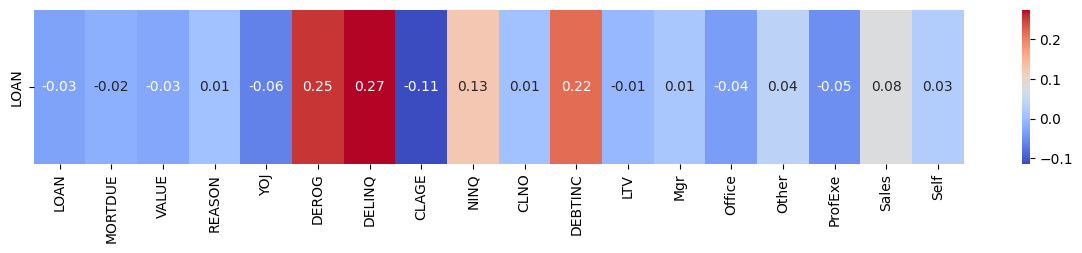

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

first_line = correlation_matrix.iloc[0, :]

# Drop the first value from first_line
first_line_without_first_value = first_line.iloc[1:]

# Create a heatmap of the first line without the first value
plt.figure(figsize=(15, 2))
sns.heatmap(first_line_without_first_value.to_numpy().reshape(1, -1), annot=True, cmap="coolwarm", fmt=".2f", xticklabels=df.columns[1:], yticklabels=[df.columns[1]])
plt.show()

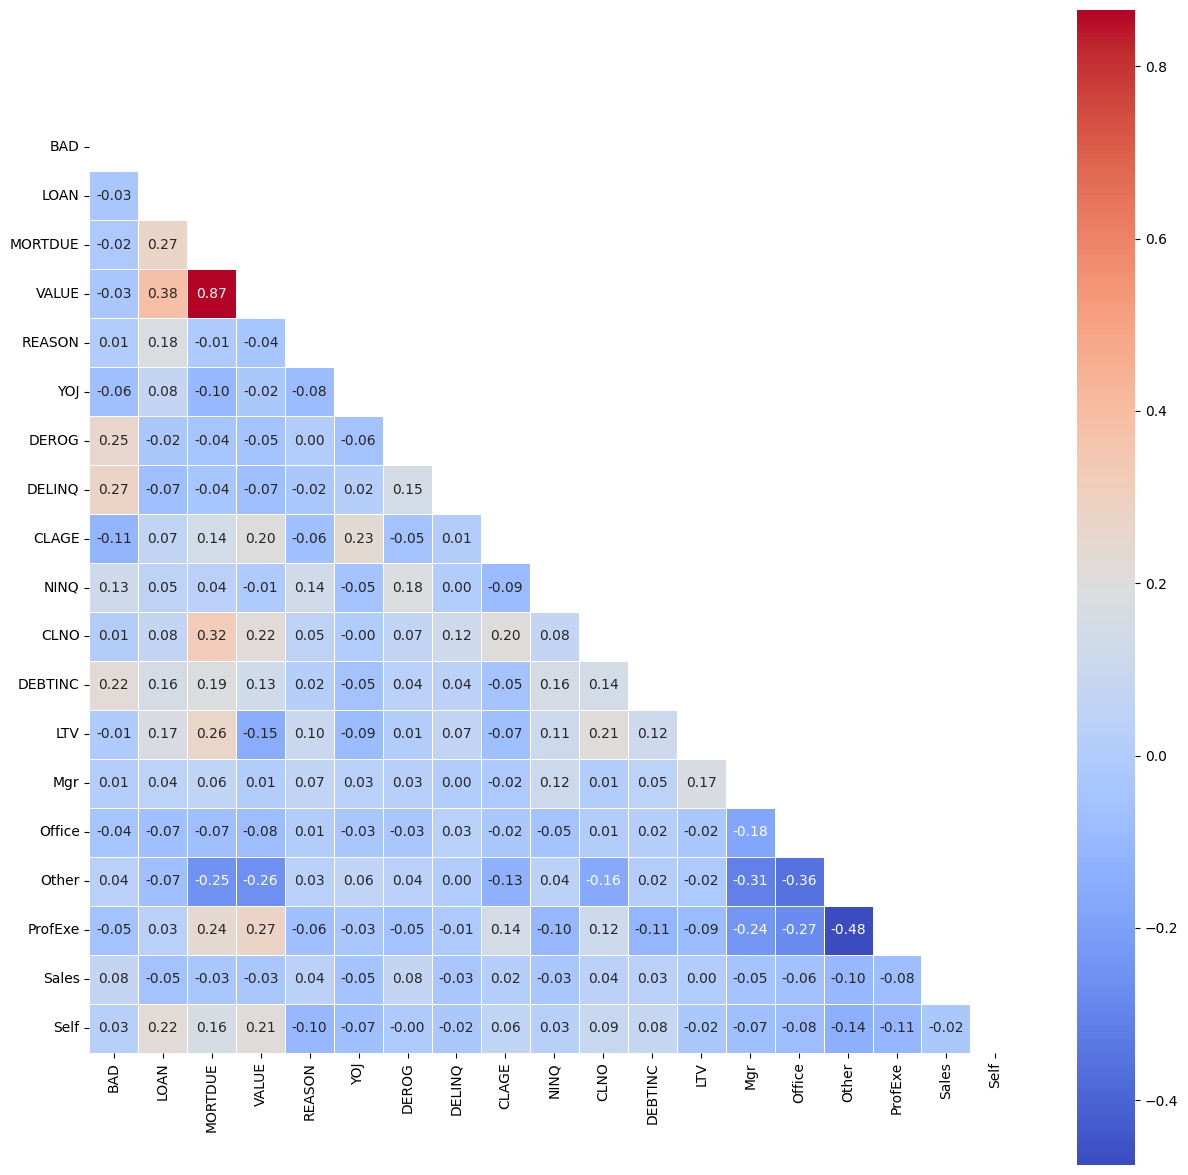

In [114]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=.5)

# Display the plot
plt.show()


## 2.7 data setup

In [115]:
y = equity_loan_df.copy().pop('BAD')
X = equity_loan_df.drop('BAD', axis=1)

In [116]:
## replace all true or false with 1, 0
X = X.replace({True: 1, False: 0})

In [117]:
X.shape, y.shape

((3364, 18), (3364,))

## 2.8 Develop the logistic regression model and alternative solutions with tensorflow

### 2.8.0 functionalize the process

In [118]:
import statsmodels.api as sm
location_df.head()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def logistic_regression_analysis(X_train, X_test, y_train, y_test, model_name="Logistic Regression Model", thresholds=None):
    if thresholds is None:
        thresholds = [0.02, 0.05 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]  # Default threshold

    # Fit the logistic regression model using statsmodels
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    # Make predictions on the test data
    y_pred_probs_test = result.predict(X_test)
    y_pred_probs_train = result.predict(X_train)

    # Plot ROC Curve
    plt.figure(figsize=(16, 6))

    for threshold in thresholds:
        plt.subplot(1, 2, 1)
        y_pred_test = (y_pred_probs_test >= threshold).astype(int)

        # Evaluate the model
        accuracy_test = accuracy_score(y_test, y_pred_test)
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        class_report_test = classification_report(y_test, y_pred_test)

        # ROC Curve and AUC calculation for test data
        fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
        roc_auc_test = auc(fpr_test, tpr_test)

        # Plot ROC Curve for test data
        plt.plot(fpr_test, tpr_test, label=f'Threshold = {threshold} (AUC = {roc_auc_test:.2f})')
        plt.title('ROC Curves for Different Thresholds (Test Data)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")

        plt.subplot(1, 2, 2)
        y_pred_train = (y_pred_probs_train >= threshold).astype(int)

        # Evaluate the model
        accuracy_train = accuracy_score(y_train, y_pred_train)
        conf_matrix_train = confusion_matrix(y_train, y_pred_train)
        class_report_train = classification_report(y_train, y_pred_train)

        # ROC Curve and AUC calculation for training data
        fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
        roc_auc_train = auc(fpr_train, tpr_train)

        # Plot ROC Curve for training data
        plt.plot(fpr_train, tpr_train, label=f'Threshold = {threshold} (AUC = {roc_auc_train:.2f})')
        plt.title('ROC Curves for Different Thresholds (Train Data)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")

    # Finalize ROC plot for test data
    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # Reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curves for Different Thresholds (Test Data)')
    plt.legend(loc="lower right")

    # Finalize ROC plot for training data
    plt.subplot(1, 2, 2)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # Reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curves for Different Thresholds (Train Data)')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Print the full statistical report
    print(result.summary())

# Example usage:
# logistic_regression_analysis(X_train, X_test, y_train, y_test, model_name="Model_1", thresholds=[0.3, 0.5, 0.7])

TEST_SIZE = 0.2
RANDOM_SEED=24

### 2.8.1 Model-1 Simple Binary Logistic Regression



Optimization terminated successfully.
         Current function value: 0.231355
         Iterations 8


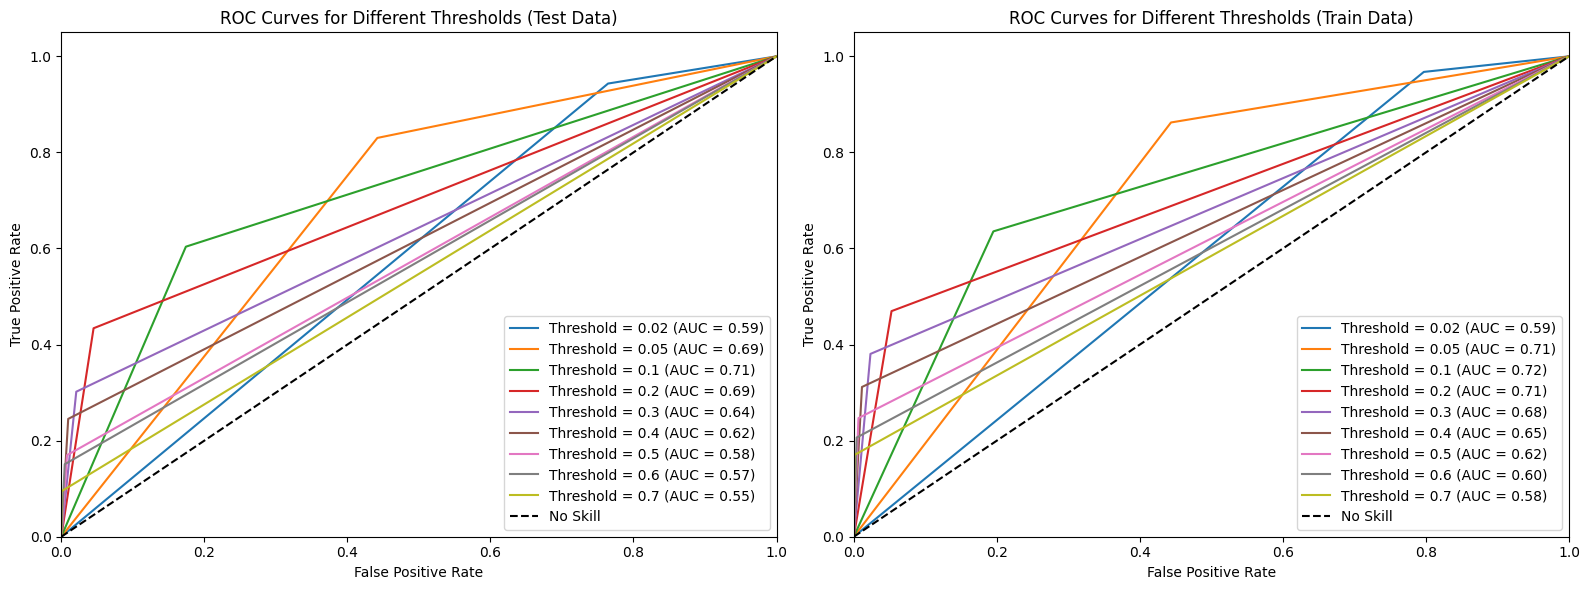

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2673
Method:                           MLE   Df Model:                           17
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.2456
Time:                        03:28:08   Log-Likelihood:                -622.58
converged:                       True   LL-Null:                       -825.21
Covariance Type:            nonrobust   LLR p-value:                 1.473e-75
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LOAN        4.223e-06   1.51e-05      0.280      0.779   -2.53e-05    3.38e-05
MORTDUE     2.409e-05   1.21e-05      1.991      0.047    3.73e-07    4.78e-05
VALUE      -2.033e-05   1.07e-05     -1.892      0.0

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

logistic_regression_analysis(X_train, X_test, y_train, y_test, model_name="Model_1")

### 2.8.2 Model-2 : Improve on the Model-1 by dropping off values

drop off the coefficient with p-value larger than 0.1

Optimization terminated successfully.
         Current function value: 0.232661
         Iterations 8


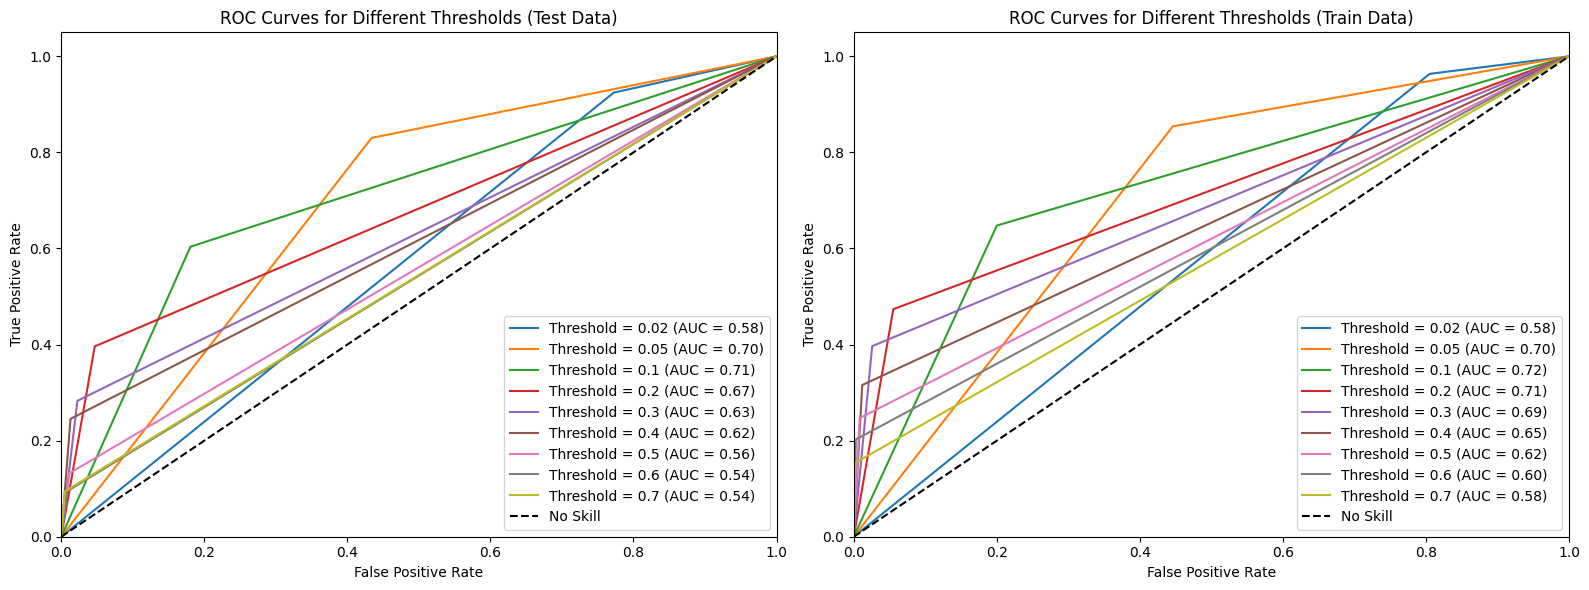

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2678
Method:                           MLE   Df Model:                           12
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.2413
Time:                        03:28:10   Log-Likelihood:                -626.09
converged:                       True   LL-Null:                       -825.21
Covariance Type:            nonrobust   LLR p-value:                 8.973e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
MORTDUE     2.786e-05    6.2e-06      4.495      0.000    1.57e-05       4e-05
VALUE      -2.336e-05   5.11e-06     -4.568      0.000   -3.34e-05   -1.33e-05
DEROG          0.7664      0.111      6.925      0.0

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop(['LOAN',
                                                            'REASON',
                                                            'YOJ',
                                                            'NINQ',
                                                            'Sales']
                                                           , axis=1),
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

# Add a constant to the features for the intercept
logistic_regression_analysis(X_train, X_test, y_train, y_test, model_name="Model_2")

### 2.8.3 Model-3 : Improve on model-1 using PCA

Explained variance by each principal component:
 [9.19785395e-01 6.01984181e-02 2.00148283e-02 1.31912065e-06
 1.58546856e-08 1.22170766e-08 1.07106338e-08 4.67211303e-10
 1.43492981e-10 6.60243003e-11 5.84125508e-11 4.24205634e-11
 3.89476202e-11 3.03162230e-11 7.15391520e-12 6.50496237e-12
 3.41801898e-12 1.00732312e-41]
Number of principal components chosen: 18
         Current function value: 0.652684
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

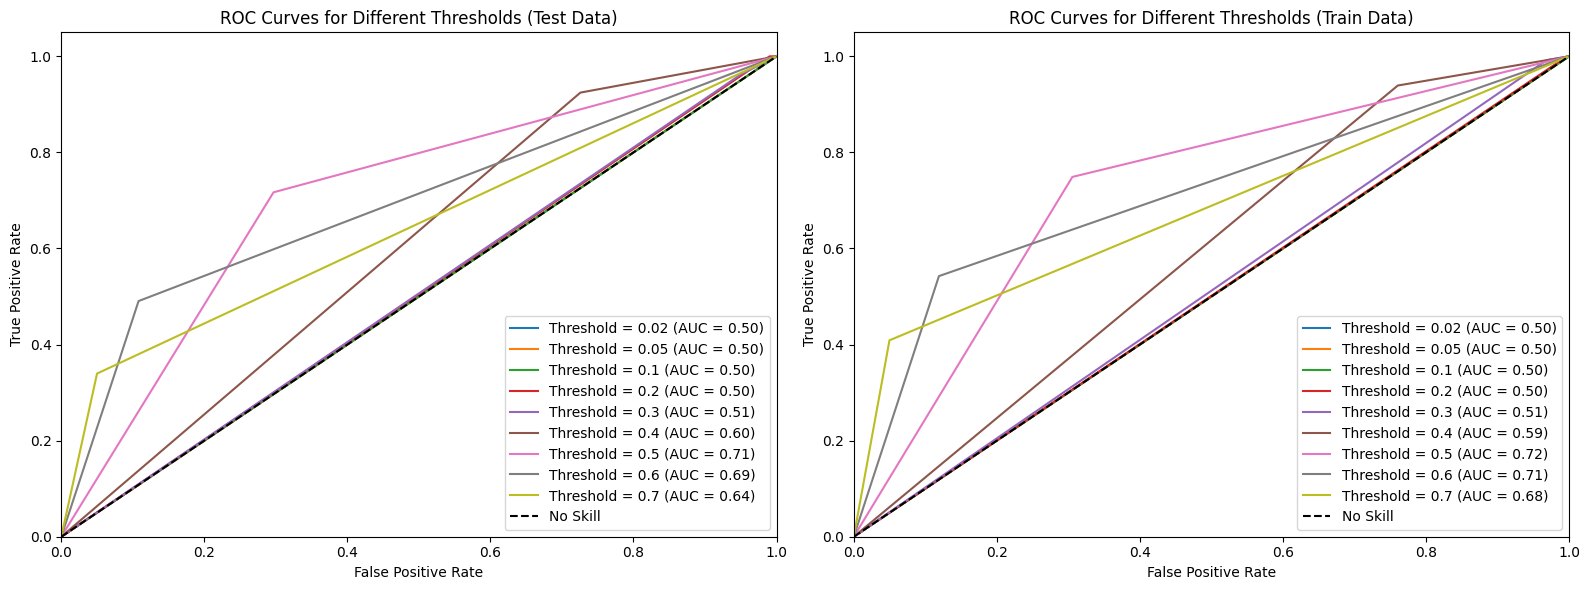

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2674
Method:                           MLE   Df Model:                           16
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  -1.128
Time:                        03:28:11   Log-Likelihood:                -1756.4
converged:                      False   LL-Null:                       -825.21
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.851e-07   5.97e-07     -0.812      0.417   -1.66e-06    6.85e-07
x2          8.799e-07   2.37e-06      0.371      0.711   -3.77e-06    5.53e-06
x3         -4.442e-06    4.1e-06     -1.084      0.2

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features (mean = 0, variance = 1)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=18)
X_train_pca = pca.fit_transform(X_train)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:\n", explained_variance)

# Number of components chosen
n_components = pca.n_components_
print("Number of principal components chosen:", n_components)

# Optionally, apply the same transformations to the test set
#vX_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test)


logistic_regression_analysis(X_train_pca,
                             X_test_pca,
                             y_train,
                             y_test,
                             model_name="Model_3")

### 2.8.4 Model-4 : Data scaling

         Current function value: 0.652684
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

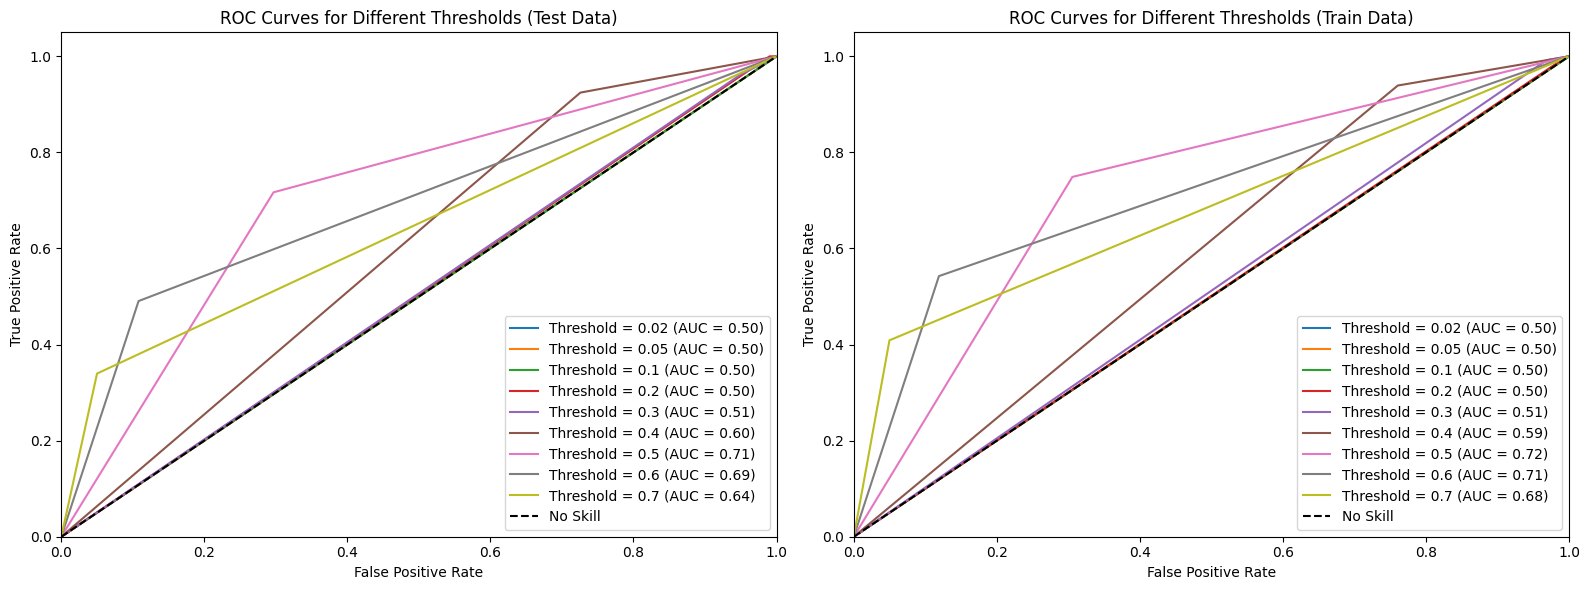

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2674
Method:                           MLE   Df Model:                           16
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  -1.128
Time:                        03:28:13   Log-Likelihood:                -1756.4
converged:                      False   LL-Null:                       -825.21
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0610      0.057     -1.063      0.288      -0.173       0.051
x2            -0.0211      0.166     -0.127      0.899      -0.346       0.304
x3             0.0232      0.173      0.134      0.8

In [122]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_analysis(X_train_scaled,
                             X_test_scaled,
                             y_train,
                             y_test,
                             model_name="Model_4")

### 2.8.5 Model-5 : Feature engineering

         Current function value: 0.202780
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


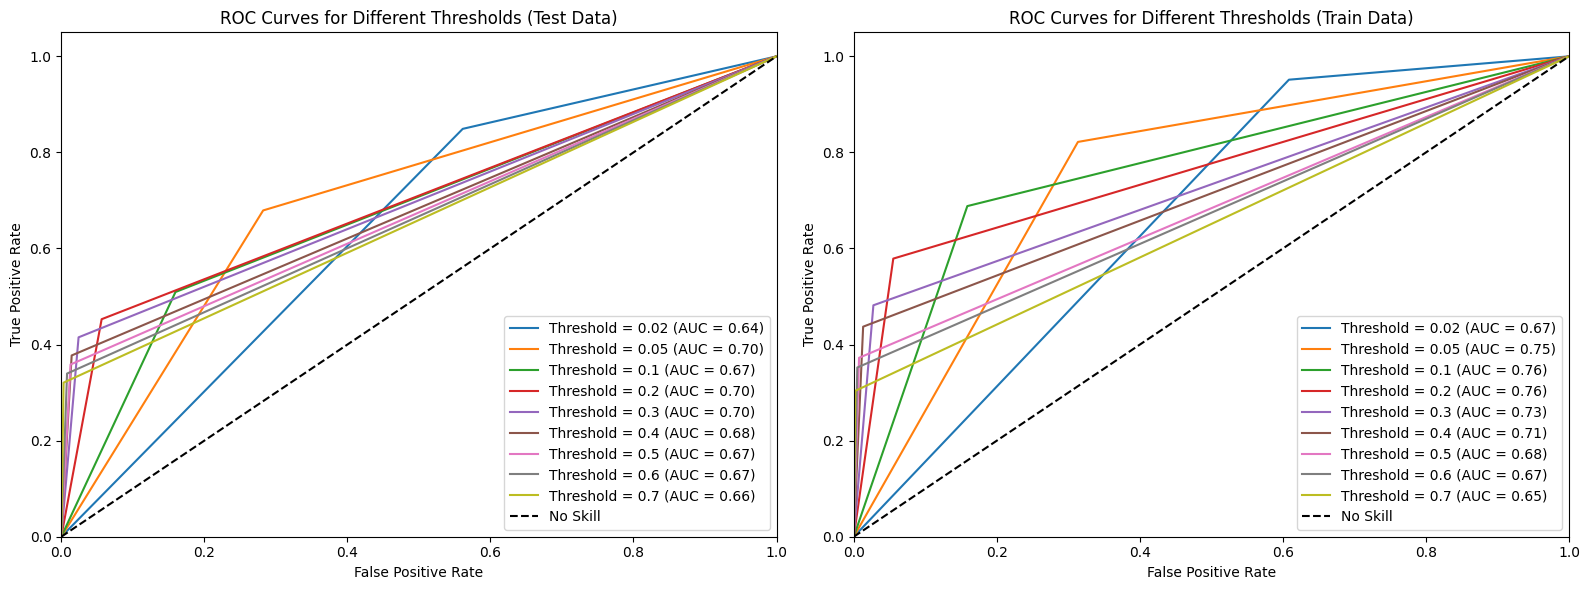

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2658
Method:                           MLE   Df Model:                           32
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.3387
Time:                        03:28:14   Log-Likelihood:                -545.68
converged:                      False   LL-Null:                       -825.21
Covariance Type:            nonrobust   LLR p-value:                 1.612e-97
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
LOAN                 -0.0243    158.742     -0.000      1.000    -311.153     311.105
MORTDUE               0.0062        nan        nan        nan         nan         nan
VALUE                -0.

In [123]:
X_engineered = X.copy()

# columns suitable for feature engineering
features = ['LOAN',
           'MORTDUE',
           'VALUE',
           'DEBTINC',
            'LTV']

for i in features:
    #  Polynomial Features
    X_engineered[i+'^2'] = np.power(X_engineered[i], 2)
    X_engineered[i+'^-1'] = np.power(X_engineered[i], -1)
    # Logarithmic Transformation
    X_engineered[i+'_log'] = np.log(X_engineered[i])

n = len(features)
# Interaction Features
for i in range(n):
    for j in range(i+1,n):
        X_engineered[features[i]+'_x_'+features[j]] = X_engineered[features[i]]+X_engineered[features[j]]

X_engineered = X_engineered.drop(['VALUE_x_LTV'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_engineered,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

logistic_regression_analysis(X_train,
                             X_test,
                             y_train,
                             y_test,
                             model_name="Model_5")

### 2.8.6 Model-6 : dropping insignificant features from model-5

         Current function value: 0.209827
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


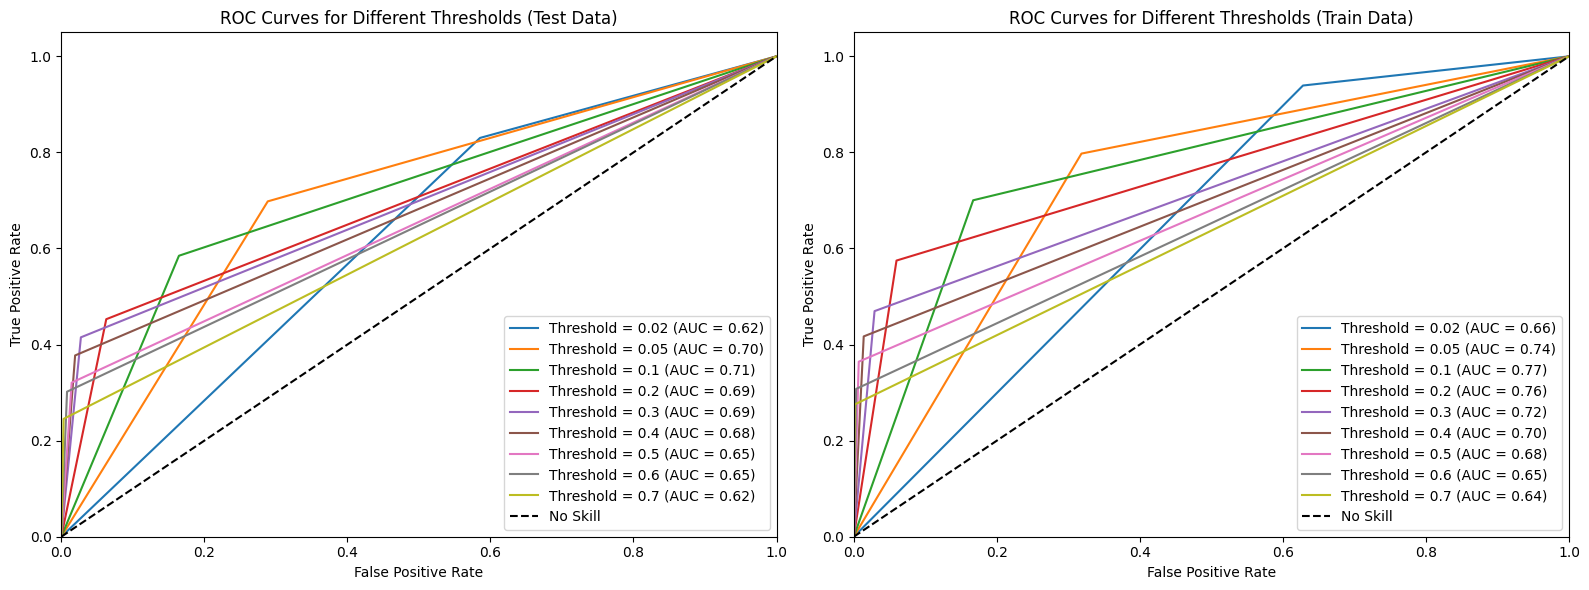

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2671
Method:                           MLE   Df Model:                           19
Date:                Mon, 20 May 2024   Pseudo R-squ.:                  0.3158
Time:                        03:28:15   Log-Likelihood:                -564.64
converged:                      False   LL-Null:                       -825.21
Covariance Type:            nonrobust   LLR p-value:                 2.052e-98
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
DEROG                 0.8463      0.120      7.076      0.000       0.612       1.081
DELINQ                0.7972      0.078     10.280      0.000       0.645       0.949
CLAGE                -0.

In [124]:
X_engineered = X.copy()

# columns suitable for feature engineering
features = ['LOAN',
           'MORTDUE',
           'VALUE',
           'DEBTINC',
            'LTV']

for i in features:
    #  Polynomial Features
    X_engineered[i+'^2'] = np.power(X_engineered[i], 2)
    X_engineered[i+'^-1'] = np.power(X_engineered[i], -1)
    # Logarithmic Transformation
    X_engineered[i+'_log'] = np.log(X_engineered[i])

n = len(features)
# Interaction Features
for i in range(n):
    for j in range(i+1,n):
        X_engineered[features[i]+'_x_'+features[j]] = X_engineered[features[i]]+X_engineered[features[j]]

X_engineered = X_engineered.drop(['VALUE_x_LTV',
                                  'MORTDUE',
                                  'LOAN',
                                  'VALUE',
                                  'YOJ',
                                  'LOAN_x_MORTDUE',
                                  'MORTDUE_x_LTV',
                                  'DEBTINC',
                                  'MORTDUE^2',
                                  'MORTDUE^-1',
                                  'LOAN_x_VALUE',
                                  'LOAN_x_DEBTINC',
                                  'MORTDUE_x_VALUE',
                                  'VALUE_x_DEBTINC',
                                  'VALUE^-1',
                                  'LTV_log',
                                  'LTV^2',
                                  'DEBTINC^-1',
                                  'REASON',
                                  'NINQ',
                                  'LTV^-1',
                                    'CLNO',
                                  'VALUE^2'
                                 ],axis=1)




X_train, X_test, y_train, y_test = train_test_split(X_engineered,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

logistic_regression_analysis(X_train,
                             X_test,
                             y_train,
                             y_test,
                             model_name="Model_6")

### 2.8.7 model-7 : applying PCA to model 5

Explained variance by each principal component:
 [9.61536025e-01 3.73451694e-02 1.11880539e-03 7.02765558e-12
 3.45658128e-13 1.38062959e-13 1.31847173e-15 1.38922835e-17
 1.63067325e-19 1.22868128e-19 1.17721468e-19 6.28995429e-21
 5.02819365e-21 1.55155122e-21 7.22846499e-22 6.29604665e-22
 4.59502562e-22 4.01045945e-22 3.24124758e-22 8.91846449e-23
 6.99664801e-23 4.14356701e-23 3.53938407e-23 2.31629527e-23
 2.11453641e-23 1.04893941e-23 3.08801775e-24 3.71637656e-25]
Number of principal components chosen: 28
Optimization terminated successfully.
         Current function value: 0.506880
         Iterations 9


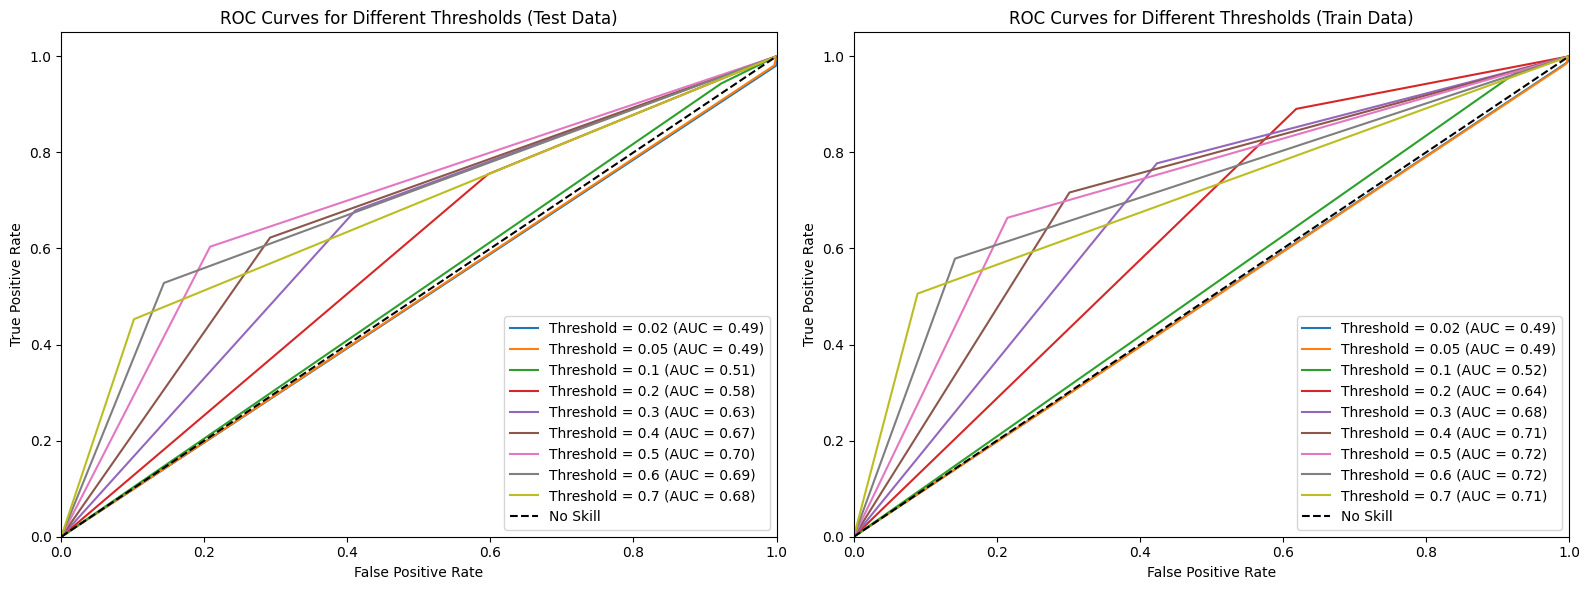

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2663
Method:                           MLE   Df Model:                           27
Date:                Mon, 20 May 2024   Pseudo R-squ.:                 -0.6529
Time:                        03:28:16   Log-Likelihood:                -1364.0
converged:                       True   LL-Null:                       -825.21
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.054e-11   2.67e-12     11.442      0.000    2.53e-11    3.58e-11
x2          1.261e-11   1.17e-11      1.078      0.281   -1.03e-11    3.55e-11
x3          9.848e-10   8.99e-11     10.956      0.0

In [125]:
X_engineered = X.copy()

# columns suitable for feature engineering
features = ['LOAN',
           'MORTDUE',
           'VALUE',
           'DEBTINC',
            'LTV']

for i in features:
    #  Polynomial Features
    X_engineered[i+'^2'] = np.power(X_engineered[i], 2)
    X_engineered[i+'^-1'] = np.power(X_engineered[i], -1)
    # Logarithmic Transformation
    X_engineered[i+'_log'] = np.log(X_engineered[i])

n = len(features)
# Interaction Features
for i in range(n):
    for j in range(i+1,n):
        X_engineered[features[i]+'_x_'+features[j]] = X_engineered[features[i]]+X_engineered[features[j]]

X_engineered = X_engineered.drop(['VALUE_x_LTV'
                                 ],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_engineered,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

# Apply PCA
pca = PCA(n_components=28)
X_train_pca = pca.fit_transform(X_train)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:\n", explained_variance)

# Number of components chosen
n_components = pca.n_components_
print("Number of principal components chosen:", n_components)

# Optionally, apply the same transformations to the test set
#vX_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test)


logistic_regression_analysis(X_train_pca,
                             X_test_pca,
                             y_train,
                             y_test,
                             model_name="Model_7")

### 2.8.8 model-8 : using machine learning model as alternative on engineered data

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg



from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def build_model(input_shape, regularizer_value=0.0005):
    tf.random.set_seed(8)
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,), kernel_regularizer=l1(regularizer_value)),
        Dense(32, activation='relu', kernel_regularizer=l1(regularizer_value)),
        Dense(1, activation='sigmoid', kernel_regularizer=l1(regularizer_value))
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def logistic_regression_analysis_tf(X_train, X_test, y_train, y_test, model_name="TensorFlow Model", thresholds=None):
    if thresholds is None:
        thresholds = [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]  # Default threshold

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the model
    model = build_model(X_train_scaled.shape[1])
    model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

    # Make predictions on the test data
    y_pred_probs_test = model.predict(X_test_scaled).ravel()
    y_pred_probs_train = model.predict(X_train_scaled).ravel()

    # Plot ROC Curve
    plt.figure(figsize=(16, 6))

    for threshold in thresholds:
        plt.subplot(1, 2, 1)
        y_pred_test = (y_pred_probs_test >= threshold).astype(int)

        # Evaluate the model
        accuracy_test = accuracy_score(y_test, y_pred_test)
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        class_report_test = classification_report(y_test, y_pred_test)

        # ROC Curve and AUC calculation for test data
        fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
        roc_auc_test = auc(fpr_test, tpr_test)

        # Plot ROC Curve for test data
        plt.plot(fpr_test, tpr_test, label=f'Threshold = {threshold} (AUC = {roc_auc_test:.2f})')
        plt.title('ROC Curves for Different Thresholds (Test Data)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")

        plt.subplot(1, 2, 2)
        y_pred_train = (y_pred_probs_train >= threshold).astype(int)

        # Evaluate the model
        accuracy_train = accuracy_score(y_train, y_pred_train)
        conf_matrix_train = confusion_matrix(y_train, y_pred_train)
        class_report_train = classification_report(y_train, y_pred_train)

        # ROC Curve and AUC calculation for training data
        fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
        roc_auc_train = auc(fpr_train, tpr_train)

        # Plot ROC Curve for training data
        plt.plot(fpr_train, tpr_train, label=f'Threshold = {threshold} (AUC = {roc_auc_train:.2f})')
        plt.title('ROC Curves for Different Thresholds (Train Data)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")

    # Finalize ROC plot for test data
    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # Reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curves for Different Thresholds (Test Data)')
    plt.legend(loc="lower right")

    # Finalize ROC plot for training data
    plt.subplot(1, 2, 2)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # Reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curves for Different Thresholds (Train Data)')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# Example usage:
# X_train, X_test, y_train, y_test should be defined with your dataset
# logistic_regression_analysis_tf(X_train, X_test, y_train, y_test, model_name="Model_1", thresholds=[0.3, 0.5, 0.7])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2752      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
85/85 [==============================] - 0s 1ms/step


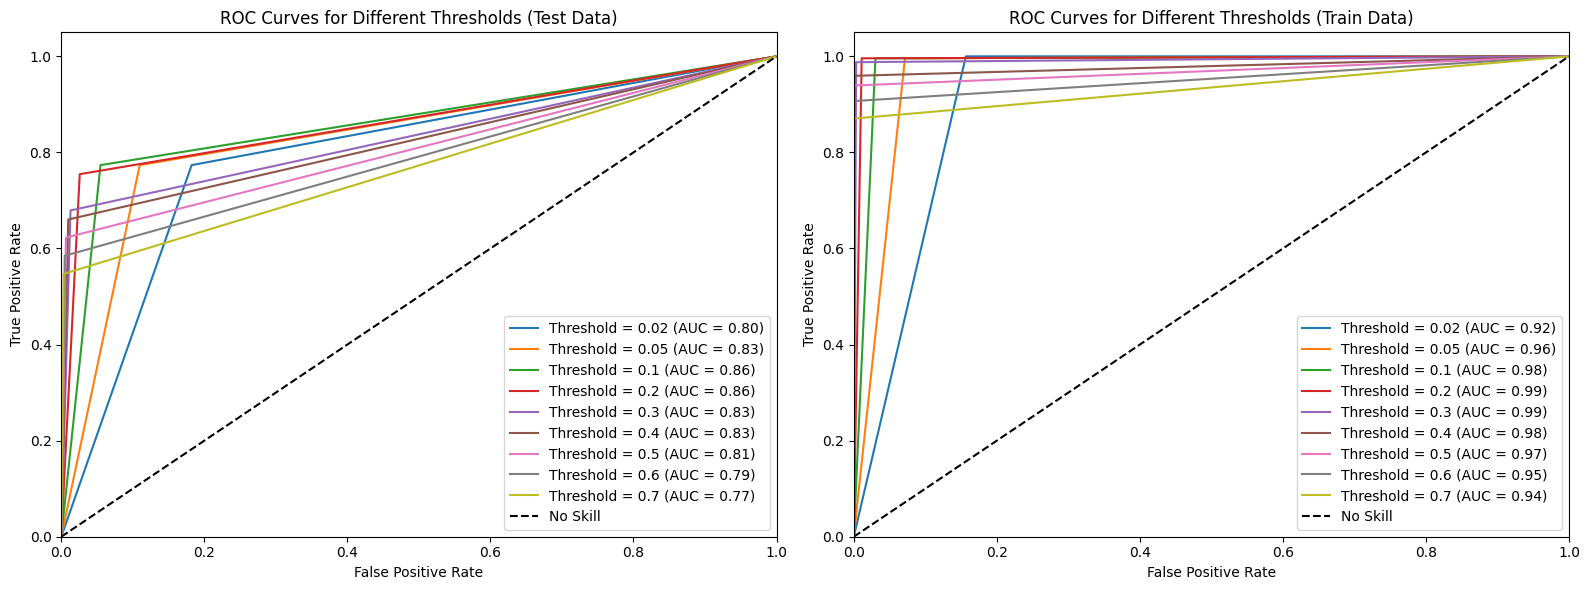

In [127]:
X_engineered = X.copy()

# columns suitable for feature engineering
features = ['LOAN',
           'MORTDUE',
           'VALUE',
           'DEBTINC',
            'LTV']

for i in features:
    #  Polynomial Features
    X_engineered[i+'^2'] = np.power(X_engineered[i], 2)
    X_engineered[i+'^-1'] = np.power(X_engineered[i], -1)
    # Logarithmic Transformation
    X_engineered[i+'_log'] = np.log(X_engineered[i])

n = len(features)
# Interaction Features
for i in range(n):
    for j in range(i+1,n):
        X_engineered[features[i]+'_x_'+features[j]] = X_engineered[features[i]]+X_engineered[features[j]]

X_engineered = X_engineered.drop(['VALUE_x_LTV'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_engineered,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

logistic_regression_analysis_tf(X_train, X_test, y_train, y_test, model_name="Model_8")

### 2.8.9 model 9 : Gradient-based model on unengineered data

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1216      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
85/85 [==============================] - 0s 1ms/step


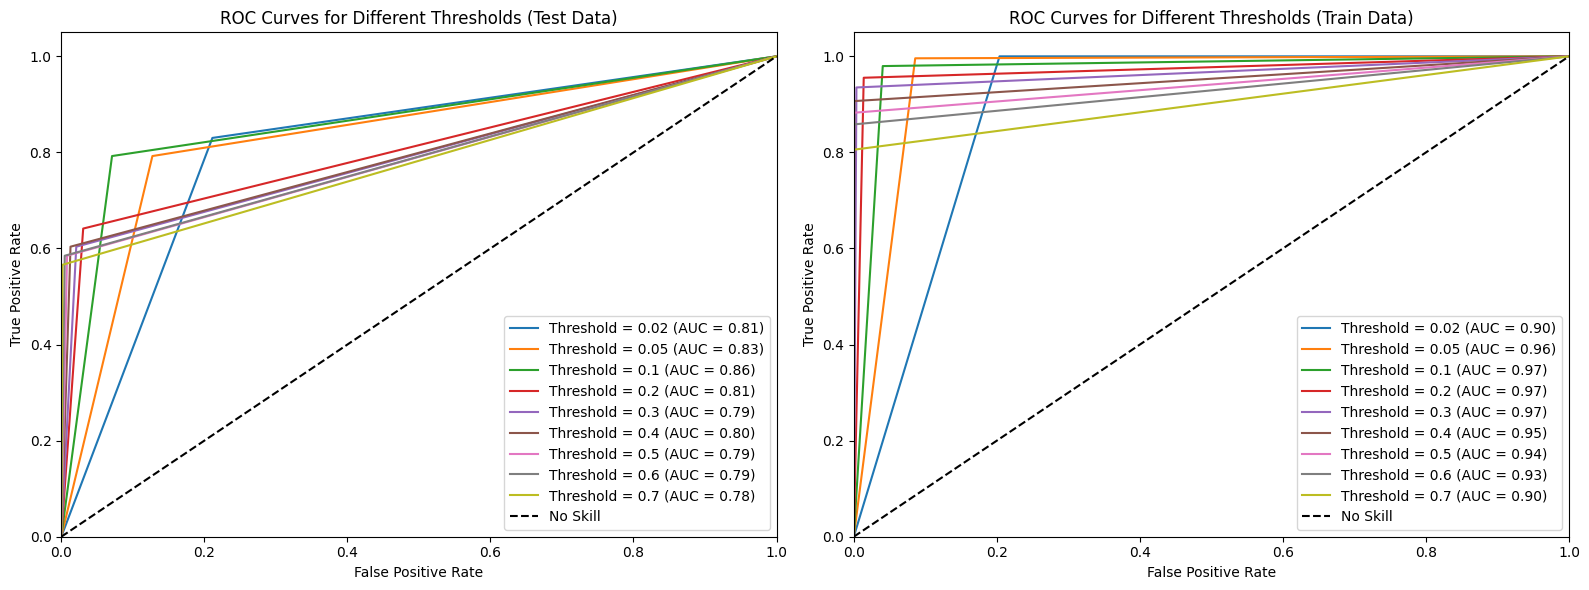

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_SEED)

logistic_regression_analysis_tf(X_train, X_test, y_train, y_test, model_name="Model_9")

## 2.9 summary : Gradient-based models outperforms the logistcal regressions

- No logistic model performs more than 0.71 on test data, with best one being model 1.
- A simple Gradient-based model outperforms that by a large margin on the test data even with a larger gap between train and test data performace.(model 8: AUC on train data: 0.98; AUC on test data: 0.85; threshold: 0.1). https://www.analyticsvidhya.com/blog/2021/06/complete-guide-to-gradient-based-optimizers/
- The gap between test and train is expected and mostly likely due to model overfitting. I don't have enough time to dig more into that, but here is a tutorial on solving overfitting. https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

| Model Name | Best AUC on test data | AUC on train data | Threshold |
|----------|----------|----------|----------|
| Model 1 | 0.71 | 0.72 | 0.1 |
| Model 2 | 0.71 | 0.72 | 0.1 |
| Model 3 | 0.71 | 0.72 | 0.5 |
| Model 4 | 0.71 | 0.72 | 0.5 |
| Model 5 | 0.70 | 0.76 | 0.2 |
| Model 6 | 0.71 | 0.77 | 0.1 |
| Model 7 | 0.70 | 0.72 | 0.6 |
| Model 8 | 0.85 | 0.98 | 0.1 |
| Model 9 | 0.85 | 0.97 | 0.1 |


**results may vary a bit due to the random state and nature of gradient descent.


### 2.9.1 The reason that Gradient-based model works better than logistic regression model

The gradient descent is a numerical method with much simplier process to find estimations for parameters compared to traditional statistical models, which allows the model to carry more complexity and non-linearity. https://builtin.com/data-science/gradient-descent


### 2.9.2 Some situations that traditional statistical models are still prefered over Gradient-based models.

Even though that gradient-based model out performs all the logistical regression models above, still in many situation a traditional statistical model like logistical regression models would be considered to be a better choice.

1. **Dataset is small(n<1000) :**  The gradient descent method requires way more data than traditional methods to reach the stable estimations of the parameters.
2. **Strong needs to interpretar each factor** The gradient descent can not offer statistics on the estimations of the parameters. When interpretaring each factor is important, logistical regression models are still better.

### 2.9.3 use of PCA and Sclaing

1. Even though applying PCA and Sclaing to data does not improve the performance in ogistic regression models, but it moves the optimal threshold to or close to 0.5. It can be very useful when it is hard to decide on a threshold.

2. In theoary, scaling should not have an impact on model performance. However, in reality computers are limited to its computational precision and scaling(Standardization and Normalization) can improve the process of **matrix computations**.
   - Scaling migth not improve the performance of logistic regression models and alikes by significant margin. The reason could be that such model only requires 2 or 3 steps of matrix computing and the scaling process itself could compress the dataset and lose some information.
   - Scaling is essential for Gradient-based model(Machine learning models) since such model would involve tens of thousands or millions even billions of matrix computations during training and predictions.

### 2.9.4 Validation set

Even though the models are fitted on training data not on testing data, the selection process is based on the testing data, which means the models are also fitted on testing data in an **indirect** way.

1. Thereofore, before deployment, it is important to further validate the model with the third set of data which is unrelated to the training and testing data, which is the Validation set.
A better explanation on train-test-validation split https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/



### 2.9.5 continuous monitoring on the model performance
There are some bullet points I think are import for model monitoring if model 8 were deployed

1. **Establish Baseline Performance Metrics** : using the performance of model 1 and model 8 in this instance as two baselines.
2. **Monitoring Tools and Dashboards** : TensorBoard, Grafana and Azure Monitor
3. **Alerts and Notifications** : Configure alerts to notify when:
    * Performance metrics degrade beyond a certain threshold.
    * Data drift exceeds acceptable limits.
    * System errors or latency issues occur.

      
4. **Periodic Re-evaluation** : Regularly re-evaluate your model using fresh data. This can be done by:

    * Re-training: Periodically retrain the model with the latest data to ensure it remains accurate.
    * A/B Testing: Compare the performance of the deployed model with a new version to evaluate improvements.
    * Shadow Deployment: Run a new model version in parallel with the current model to gather performance metrics without affecting the production system.